In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
### Decide about the features to take according to the submission file
data = pd.read_csv('calls_Irina/train_2011_2012_2013.csv',sep=';',usecols=['DATE','ASS_ASSIGNMENT','CSPL_RECEIVED_CALLS'])

In [3]:
subm_data = pd.read_table('calls_Irina/submission.txt')

In [9]:
import pickle
pickle.dump(data, open('data.pkl','wb'))
pickle.dump(subm_data, open('subm_data.pkl','wb'))

In [91]:
data = pickle.load(open('data.pkl', 'rb'))
subm_data = pickle.load(open('subm_data.pkl', 'rb'))

In [5]:
import time
data['time'] = data['DATE'].apply(lambda x: time.strptime(x, '%Y-%m-%d %H:%M:%S.000'))
subm_data['time'] = subm_data['DATE'].apply(lambda x: time.strptime(x, '%Y-%m-%d %H:%M:%S.000'))

In [8]:
data['day_week'] = data['time'].apply(lambda x: int(time.strftime("%w", x)))
data['day_month'] = data['time'].apply(lambda x: int(time.strftime("%d", x)))
data['month'] = data['time'].apply(lambda x: int(time.strftime("%m", x)))
data['time_absolut'] = data['time'].apply(time.mktime)
#data['hours'] = data['time'].apply(lambda x: float(time.strftime("%H", x)))
data['year'] = data['time'].apply(lambda x: float(time.strftime("%Y", x)))
data['if_weekend'] = data['day_week'].apply(lambda x: 1 if x == 0 or x == 6 else 0)
data['if_night'] = data['hours'].apply(lambda x: 1 if x >= 7.5 and x <= 23.5 else 0) 

### New feature: hours since the start of the day
data['hours'] = data['time'].apply(lambda x: float(time.strftime("%H", x))+np.sign(float(time.strftime("%M", x)))*0.5)

subm_data['time_absolut'] = subm_data['time'].apply(time.mktime)
subm_data['day_week'] = subm_data['time'].apply(lambda x: int(time.strftime("%w", x)))
subm_data['day_month'] = subm_data['time'].apply(lambda x: int(time.strftime("%d", x)))
subm_data['month'] = subm_data['time'].apply(lambda x: int(time.strftime("%m", x)))
subm_data['time_absolut'] = subm_data['time'].apply(time.mktime)
# subm_data['hours'] = subm_data['time'].apply(lambda x: float(time.strftime("%H", x)))
subm_data['year'] = subm_data['time'].apply(lambda x: float(time.strftime("%Y", x)))
subm_data['if_weekend'] = subm_data['day_week'].apply(lambda x: 1 if x == 0 or x == 6 else 0)
subm_data['if_night'] = subm_data['hours'].apply(lambda x: 1 if x >= 7.5 and x <= 23.5 else 0) 
subm_data['hours'] = subm_data['time'].apply(lambda x: float(time.strftime("%H", x))+np.sign(float(time.strftime("%M", x)))*0.5)


In [92]:
d = data.groupby(['hours','year','month','day_month','day_week',
                  'ASS_ASSIGNMENT','if_weekend','if_night',
                  'time','time_absolut'],as_index=False)['CSPL_RECEIVED_CALLS'].sum()
data_merged = d

In [22]:
pickle.dump(data_merged, open('data_merged.pkl','wb'))
data = data_merged

In [93]:
data

,DATE,ASS_ASSIGNMENT,CSPL_RECEIVED_CALLS,time,day_week,day_month,month,time_absolut,hours,year,if_weekend,if_night
0,2011-04-24 01:30:00.000,Téléphonie,0,"(2011, 4, 24, 1, 30, 0, 6, 114, -1)",0,24,4,1.303601e+09,1.5,2011.0,1,0
1,2011-04-24 01:30:00.000,Téléphonie,0,"(2011, 4, 24, 1, 30, 0, 6, 114, -1)",0,24,4,1.303601e+09,1.5,2011.0,1,0
2,2011-04-24 01:30:00.000,Téléphonie,0,"(2011, 4, 24, 1, 30, 0, 6, 114, -1)",0,24,4,1.303601e+09,1.5,2011.0,1,0
3,2011-04-24 01:30:00.000,Téléphonie,0,"(2011, 4, 24, 1, 30, 0, 6, 114, -1)",0,24,4,1.303601e+09,1.5,2011.0,1,0
4,2011-04-24 01:30:00.000,Téléphonie,1,"(2011, 4, 24, 1, 30, 0, 6, 114, -1)",0,24,4,1.303601e+09,1.5,2011.0,1,0
5,2011-04-25 01:30:00.000,RTC,0,"(2011, 4, 25, 1, 30, 0, 0, 115, -1)",1,25,4,1.303688e+09,1.5,2011.0,0,0
6,2011-04-25 01:30:00.000,Gestion Renault,0,"(2011, 4, 25, 1, 30, 0, 0, 115, -1)",1,25,4,1.303688e+09,1.5,2011.0,0,0
7,2011-04-25 01:30:00.000,RTC,0,"(2011, 4, 25, 1, 30, 0, 0, 115, -1)",1,25,4,1.303688e+09,1.5,2011.0,0,0
8,2011-04-25 01:30:00.000,Nuit,5,"(2011, 4, 25, 1, 30, 0, 0, 115, -1)",1,25,4,1.303688e+09,1.5,2011.0,0,0
9,2011-04-25 01:30:00.000,Gestion - Accueil Telephonique,0,"(2011, 4, 25, 1, 30, 0, 0, 115, -1)",1,25,4,1.303688e+09,1.5,2011.0,0,0


In [94]:
cats = data['ASS_ASSIGNMENT'].unique()

In [16]:
# data = data.sample(10000)

In [114]:
def scorer(est, X, y):
    return np.mean(eval_metric(est.predict(X),y))

In [192]:
from sklearn.linear_model import LinearRegression as ln 
from sklearn.ensemble import RandomForestRegressor as rf 
#from sklearn.ensemble import RandomForestClassifier as rf 
from sklearn.cross_validation import train_test_split 
from scipy.interpolate import interp1d 

data_cat = data[data['ASS_ASSIGNMENT'] == 'Téléphonie'] 
indexes = ['hours','year','month','day_month','day_week','if_weekend','if_night'] 
dummies = ['day_week', 'month', 'ASS_ASSIGNMENT'] 
# for d in dummies: 
#     data_cat = pd.concat((data_cat, pd.get_dummies(data_cat[d])),axis=1) 
# for val in data_cat[d].unique(): 
#     indexes.append(val) 

metric_tel={} 

lim3 = 1.37*np.power(10, 9) 
lim2 = 1.36*np.power(10, 9) 
lim1 = 1.356*np.power(10, 9) 
data_Tel1 = data_cat[data_cat['time_absolut']<=lim2] 
data_Tel1 = data_Tel1[data_Tel1['time_absolut']>lim1] 
data_Tel2 = data_cat[data_cat['time_absolut']<=lim3] 
data_Tel2 = data_Tel2[data_Tel2['time_absolut']>lim2] 
data_Tel3 = data_cat[data_cat['time_absolut']>lim3] 

### data_Tel1 
X = data_Tel1['time_absolut'] 
Y = data_Tel1['CSPL_RECEIVED_CALLS'] 
X_train, X_test, y_train, y_test = train_test_split(X,Y) 
model_ln = ln() 
model_ln.fit(np.transpose(np.matrix(X_train)), np.transpose(np.matrix(y_train))) 
#model_ln.fit(X_train, y_train) 
pred = model_ln.predict(np.transpose(np.matrix(X_test))) 
#pred = model_ln.predict(X_test) 
pred = np.round(pred*1/2) 
metric_tel['Tel1'] = np.mean(eval_metric(pred.reshape(1,pred.shape[0])[0], y_test)) 

### data_Tel2 
p=300 
pred2 = np.round((Y-k).mean()*1.5)+k 
metric_tel['Tel2'] = np.mean(eval_metric(pred2, y_test)) 

### data_Tel3 
k=800 
X = data_Tel3['time_absolut'] 
Y = data_Tel3['CSPL_RECEIVED_CALLS'] 
X_train, X_test, y_train, y_test = train_test_split(X,Y) 
pred3 = np.round((Y-k).mean()*3/2)+k 
metric_tel['Tel3'] = np.mean(eval_metric(pred3, y_test)) 


def model_Tel(x): 
    if x['time_absolut']<=lim2 and x['time_absolut']>lim1 : 
        return model_ln.predict(x['time_absolut']) 
    if x['time_absolut']<=lim3 and x['time_absolut']>lim2 : 
        return pred2 
    if x['time_absolut']>lim3 : 
        return pred3

In [163]:
data_cat = data[data['ASS_ASSIGNMENT'] == 'Tech. Axa']
  
Y = data_cat['CSPL_RECEIVED_CALLS']
X = data_cat['time_absolut']
k=150
pred1 = np.round((Y-k).mean()*1.5)+k

def model_Tech_Axa(x):
    return pred1

In [154]:
import time
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from tqdm import tqdm
#models << xgb
models_rf = {}
indexes = ['hours','year','month','day_month','day_week','if_weekend','if_night']
for cat in tqdm(cats):
    if (cat not in models_rf):# and (cat != 'Téléphonie'):
        print(cat)
        print(len(data[data['ASS_ASSIGNMENT'] == cat]))
        start_time = time.time()
        X = data[data['ASS_ASSIGNMENT'] == cat][indexes]
        Y = data[data['ASS_ASSIGNMENT'] == cat]['CSPL_RECEIVED_CALLS']
#         model = xgb.XGBRegressor(max_depth=3, learning_rate=0.5, n_estimators=80, silent=False, 
#                                  objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1,
#                                  max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
#                                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
        
#         X_train, X_test, y_train, y_test = train_test_split(X,Y)
        model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=None,
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                              bootstrap=True, oob_score=False, n_jobs=1,
                              random_state=None, verbose=0, warm_start=False)
        
        model.fit(X,Y)
#         scores = cross_val_score(model,X,Y,scoring=scorer)
#         print("eval: ",scores)
        
        models_rf[cat] = model
        print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/28 [00:00<?, ?it/s]

Téléphonie
7387175


  4%|▎         | 1/28 [12:12<5:29:29, 732.19s/it]

--- 729.8247385025024 seconds ---
RTC
43123


  7%|▋         | 2/28 [12:19<3:43:02, 514.72s/it]

--- 6.228047609329224 seconds ---
Gestion Renault
46285


 11%|█         | 3/28 [12:23<2:30:36, 361.47s/it]

--- 2.6493985652923584 seconds ---
Nuit
192868


 14%|█▍        | 4/28 [12:46<1:43:57, 259.90s/it]

--- 21.822232723236084 seconds ---
Gestion - Accueil Telephonique
126677


 18%|█▊        | 5/28 [12:58<1:11:09, 185.62s/it]

--- 11.222874402999878 seconds ---
Regulation Medicale
92274


 21%|██▏       | 6/28 [13:11<49:06, 133.92s/it]  

--- 12.170271396636963 seconds ---
Services
410137


 25%|██▌       | 7/28 [13:58<37:40, 107.66s/it]

--- 45.20631718635559 seconds ---
Tech. Total
219987


 29%|██▊       | 8/28 [14:25<27:48, 83.44s/it] 

--- 25.843310594558716 seconds ---
Gestion Relation Clienteles
32149


 32%|███▏      | 9/28 [14:30<19:00, 60.05s/it]

--- 4.433290719985962 seconds ---
Crises
26652


 36%|███▌      | 10/28 [14:34<12:59, 43.33s/it]

--- 3.0132811069488525 seconds ---
Japon
92392


 39%|███▉      | 11/28 [14:48<09:44, 34.39s/it]

--- 12.253296375274658 seconds ---
Médical
373492


 43%|████▎     | 12/28 [15:31<09:49, 36.86s/it]

--- 41.45230746269226 seconds ---
Gestion Assurances
40879


 46%|████▋     | 13/28 [15:36<06:52, 27.51s/it]

--- 4.531853914260864 seconds ---
Domicile
193886


 50%|█████     | 14/28 [16:01<06:11, 26.53s/it]

--- 23.07275938987732 seconds ---
Gestion
48093


 54%|█████▎    | 15/28 [16:05<04:19, 19.99s/it]

--- 3.613219738006592 seconds ---
SAP
47661


 57%|█████▋    | 16/28 [16:12<03:11, 15.99s/it]

--- 5.625417709350586 seconds ---
RENAULT
359561


 61%|██████    | 17/28 [16:52<04:15, 23.19s/it]

--- 38.818106174468994 seconds ---
Gestion Amex
13507


 64%|██████▍   | 18/28 [16:56<02:53, 17.38s/it]

--- 2.808115243911743 seconds ---
Tech. Inter
427524


 68%|██████▊   | 19/28 [17:40<03:50, 25.58s/it]

--- 43.56027936935425 seconds ---
Gestion Clients
33614


 71%|███████▏  | 20/28 [17:46<02:36, 19.53s/it]

--- 4.3684797286987305 seconds ---
Manager
91824


 75%|███████▌  | 21/28 [17:55<01:55, 16.53s/it]

--- 8.454551696777344 seconds ---
Tech. Axa
416986


 79%|███████▊  | 22/28 [18:41<02:31, 25.17s/it]

--- 44.200226068496704 seconds ---
CAT
41206


 82%|████████▏ | 23/28 [18:49<01:40, 20.01s/it]

--- 6.9428017139434814 seconds ---
Gestion DZ
31931


 86%|████████▌ | 24/28 [18:54<01:02, 15.53s/it]

--- 3.9620893001556396 seconds ---
Mécanicien
53768


 89%|████████▉ | 25/28 [19:02<00:39, 13.32s/it]

--- 7.03194785118103 seconds ---
CMS
18803


 93%|█████████▎| 26/28 [19:06<00:21, 10.57s/it]

--- 3.1172587871551514 seconds ---
Prestataires
15354


 96%|█████████▋| 27/28 [19:10<00:08,  8.56s/it]

--- 2.859593152999878 seconds ---
Evenements
662


100%|██████████| 28/28 [19:13<00:00,  7.02s/it]

--- 2.3180267810821533 seconds ---


In [218]:
for cat in tqdm(cats):
    if (cat != 'Téléphonie'):
        print(cat)
        print(len(data[data['ASS_ASSIGNMENT'] == cat]))
        start_time = time.time()
        X = data[data['ASS_ASSIGNMENT'] == cat][indexes]
        Y = data[data['ASS_ASSIGNMENT'] == cat]['CSPL_RECEIVED_CALLS']
#         model = xgb.XGBRegressor(max_depth=3, learning_rate=0.5, n_estimators=80, silent=False, 
#                                  objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1,
#                                  max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
#                                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
        
#         X_train, X_test, y_train, y_test = train_test_split(X,Y)
        model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=None,
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                              bootstrap=True, oob_score=False, n_jobs=-1,
                              random_state=None, verbose=0, warm_start=False)
        
#         model.fit(X,Y)
        scores = cross_val_score(model,X,Y,scoring=scorer)
        print("eval: ",scores)

  0%|          | 0/28 [00:00<?, ?it/s]

RTC
43123


  7%|▋         | 2/28 [00:13<02:57,  6.82s/it]

eval:  [ 0.0559589   0.04583487  0.05504526]
Gestion Renault
46285


 11%|█         | 3/28 [00:18<02:37,  6.31s/it]

eval:  [  7.39967944e-05   4.17636025e-05   0.00000000e+00]
Nuit
192868


 14%|█▍        | 4/28 [01:00<06:45, 16.91s/it]

eval:  [ 0.05294385  0.1122816   0.04259602]
Gestion - Accueil Telephonique
126677


 18%|█▊        | 5/28 [01:20<06:53, 17.99s/it]

eval:  [ 0.01668125  0.02196176  0.06599864]
Regulation Medicale
92274


 21%|██▏       | 6/28 [01:44<07:15, 19.78s/it]

eval:  [ 0.00394476  0.00278323  0.00242509]
Services
410137


 25%|██▌       | 7/28 [03:18<14:42, 42.04s/it]

eval:  [ 0.03335072  0.03989061  0.0614625 ]
Tech. Total
219987


 29%|██▊       | 8/28 [04:11<15:02, 45.13s/it]

eval:  [ 0.08985805  0.11675394  0.2480983 ]
Gestion Relation Clienteles
32149


 32%|███▏      | 9/28 [04:19<10:46, 34.03s/it]

eval:  [ 0.00128896  0.00186523  0.00166754]
Crises
26652


 36%|███▌      | 10/28 [04:24<07:36, 25.36s/it]

eval:  [  5.54501251e-03   3.61420400e-04   8.42696828e-06]
Japon
92392


 39%|███▉      | 11/28 [04:50<07:16, 25.68s/it]

eval:  [ 0.00387726  0.00406957  0.00367602]
Médical
373492


 43%|████▎     | 12/28 [06:14<11:30, 43.15s/it]

eval:  [ 0.02507722  0.0208999   0.01616442]
Gestion Assurances
40879


 46%|████▋     | 13/28 [06:22<08:09, 32.64s/it]

eval:  [ 0.00389201  0.00415753  0.00592265]
Domicile
193886


 50%|█████     | 14/28 [07:09<08:35, 36.81s/it]

eval:  [ 0.18813689  0.1913337   0.22880436]
Gestion
48093


 54%|█████▎    | 15/28 [07:15<05:58, 27.60s/it]

eval:  [  4.91596591e-06   1.94322712e-05   3.98121215e-05]
SAP
47661


 57%|█████▋    | 16/28 [07:26<04:29, 22.45s/it]

eval:  [ 0.01070608  0.0068759   0.00604757]
RENAULT
359561


 61%|██████    | 17/28 [08:47<07:22, 40.19s/it]

eval:  [ 0.01228446  0.00702662  0.06587262]
Gestion Amex
13507


 64%|██████▍   | 18/28 [08:52<04:55, 29.51s/it]

eval:  [ 0.00240047  0.00046334  0.00075289]
Tech. Inter
427524


 68%|██████▊   | 19/28 [10:22<07:08, 47.60s/it]

eval:  [ 0.02482108  0.01686518  0.02808329]
Gestion Clients
33614


 71%|███████▏  | 20/28 [10:30<04:47, 35.96s/it]

eval:  [ 0.0017198   0.00157232  0.00183175]
Manager
91824


 75%|███████▌  | 21/28 [10:48<03:33, 30.57s/it]

eval:  [ 0.00015996  0.00011018  0.00010752]
Tech. Axa
416986


 79%|███████▊  | 22/28 [12:14<04:43, 47.25s/it]

eval:  [   431.51846726  37368.79358934    114.74989068]
CAT
41206


 82%|████████▏ | 23/28 [12:28<03:06, 37.24s/it]

eval:  [  3.06928651e+02   6.37609246e+03   9.35330259e+05]
Gestion DZ
31931


 86%|████████▌ | 24/28 [12:35<01:52, 28.18s/it]

eval:  [ 0.00025287  0.00021129  0.00022393]
Mécanicien
53768


 89%|████████▉ | 25/28 [12:48<01:10, 23.62s/it]

eval:  [ 0.00292173  0.00244747  0.00247667]
CMS
18803


 93%|█████████▎| 26/28 [12:54<00:36, 18.10s/it]

eval:  [  1.39655497e-04   6.33290150e-05   4.29571530e-05]
Prestataires
15354


 96%|█████████▋| 27/28 [12:58<00:14, 14.14s/it]

eval:  [  1.23639603e-04   1.27342648e-04   5.37691103e-05]
Evenements
662


100%|██████████| 28/28 [13:02<00:00, 11.01s/it]

eval:  [  2.38700040e+03   1.29938463e+17   9.05860288e+30]


In [120]:
models_rf

{'Téléphonie': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)}

In [136]:
indexes = ['hours','year','month','day_month','day_week','if_weekend','if_night']
tel_data = data[data['ASS_ASSIGNMENT'] == 'Téléphonie']
def get_result(x):
    res = tel_data.query('year == @x.year & month >= @x.month-1 & month <= @x.month+1 & hours == @x.hours')
    assert(len(res) > 0)
    return res['CSPL_RECEIVED_CALLS'].mean()

# models['Mécanicien'].predict(pd.DataFrame(subm_data[indexes]))
subm_data['xgb_pred'] = 0
check_sum = 0
for cat in tqdm(subm_data['ASS_ASSIGNMENT'].unique()):
    mask = subm_data['ASS_ASSIGNMENT'] == cat
    res = pd.Series(models_rf[cat].predict(subm_data[mask][indexes]),
                                               index=subm_data[mask].index)
    check_sum += res.sum()
    subm_data.ix[mask, 'xgb_pred'] = res

100%|██████████| 26/26 [00:00<00:00, 34.35it/s]


In [137]:
np.sum(subm_data['xgb_pred']), check_sum

(125400.29072827147, 125400.29072827149)

In [138]:
subm_data['xgb_pred'] = subm_data['xgb_pred'].apply(lambda x: int(np.round(x)))

In [139]:
subm_data = subm_data.drop('prediction', 1)
subm_data = subm_data.rename(index=str, columns={'xgb_pred':'prediction'})

In [132]:
subm_data[['DATE','ASS_ASSIGNMENT','prediction']].to_csv('submission_xgb.txt',sep='\t',index=False)

------ data analysis

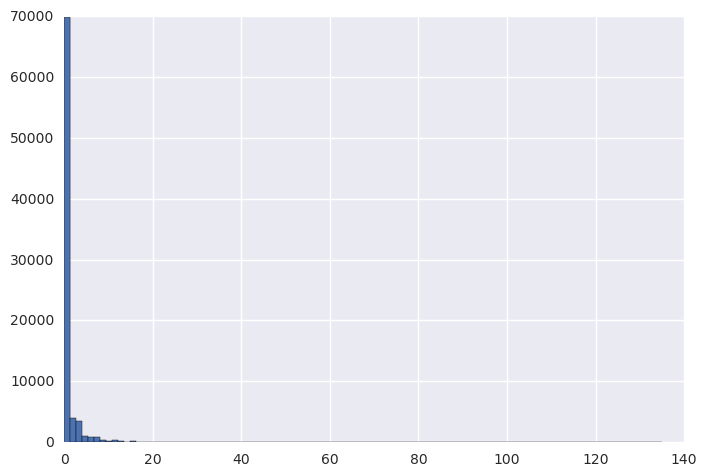

In [141]:
subm_data['prediction'].hist(bins=100)

In [48]:
cats = data['ASS_ASSIGNMENT'].unique()

array(['Crises', 'Domicile', 'Gestion', 'Gestion - Accueil Telephonique',
       'Gestion Amex', 'Gestion Assurances', 'Gestion Clients',
       'Gestion Renault', 'Japon', 'Manager', 'Médical', 'Nuit', 'RENAULT',
       'Regulation Medicale', 'SAP', 'Services', 'Tech. Axa',
       'Tech. Inter', 'Téléphonie', 'Tech. Total', 'Mécanicien',
       'Gestion Relation Clienteles', 'CAT', 'Gestion DZ', 'CMS', 'RTC',
       'Prestataires', 'Evenements'], dtype=object)

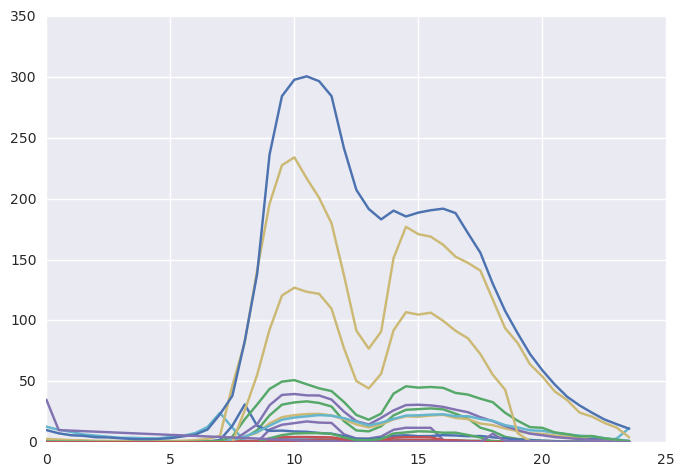

In [65]:
for cat in cats:
    data_cat = data[data['ASS_ASSIGNMENT'] == cat]
    day = 1
    data_cat = data_cat[data_cat['day_week'] == day]
    grouped = data_cat.groupby(['hours'])['CSPL_RECEIVED_CALLS'].mean()
    plt.plot(grouped)

In [134]:
data['time_absolut'].min(), data_cat['time_absolut'].max()

(1293836400.0, 1381698000.0)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


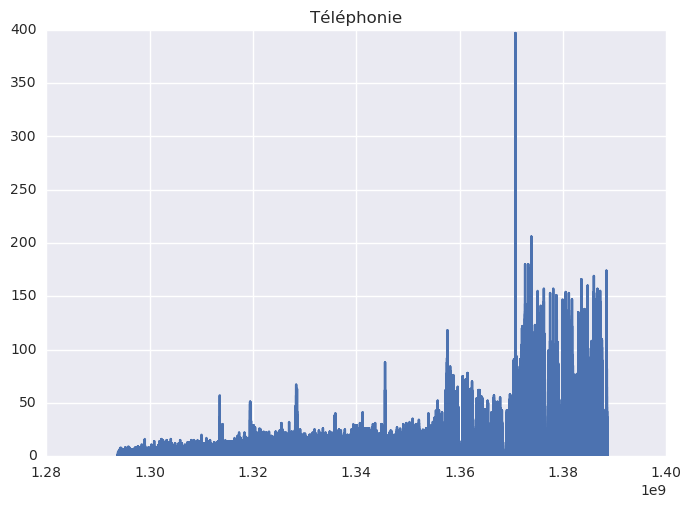

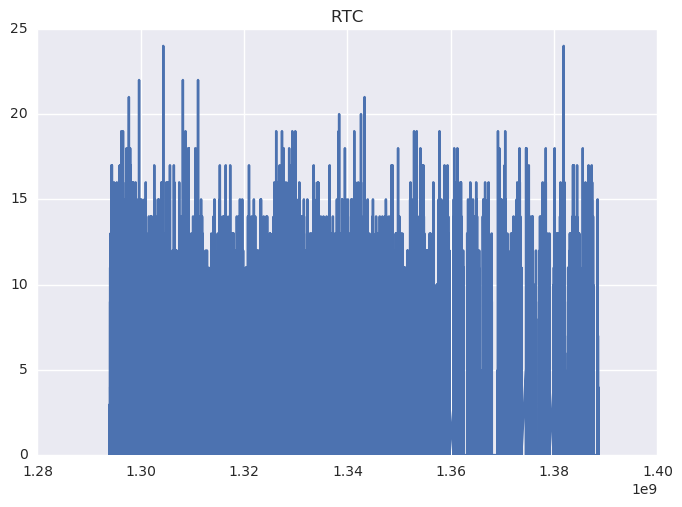

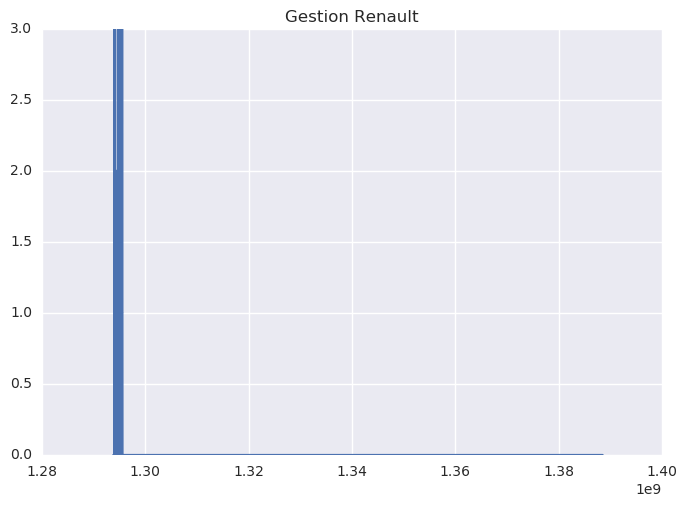

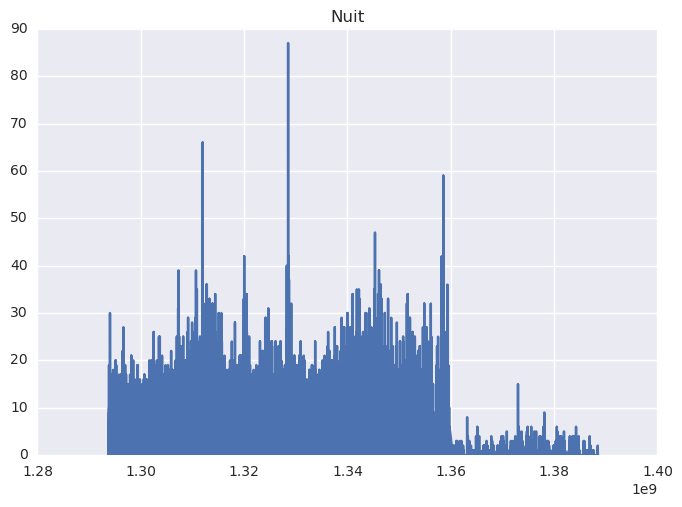

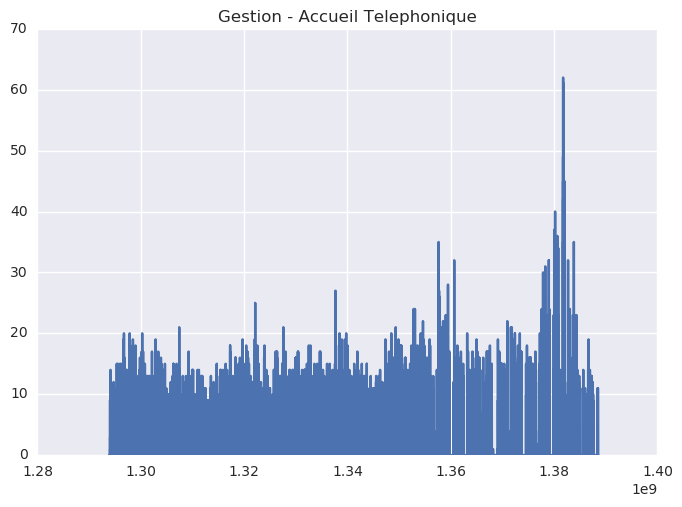

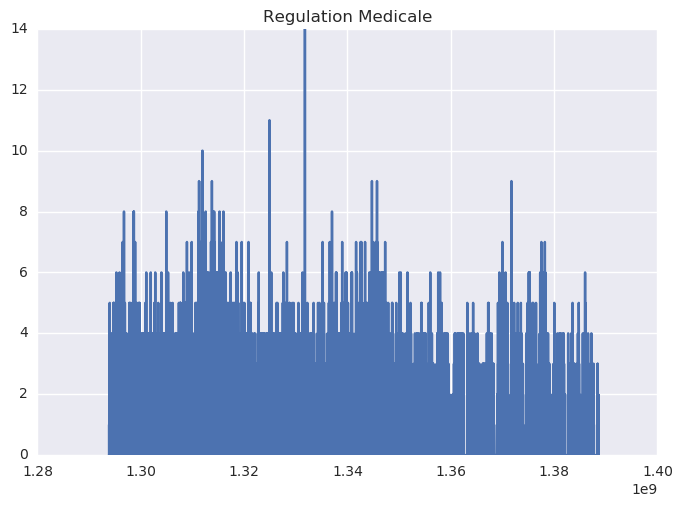

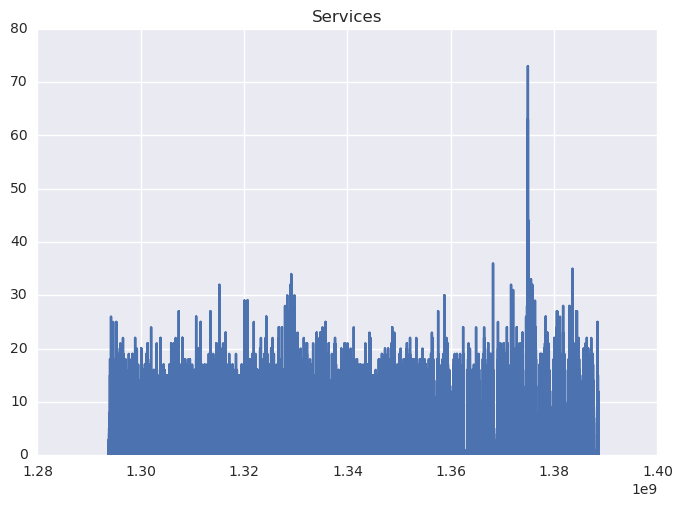

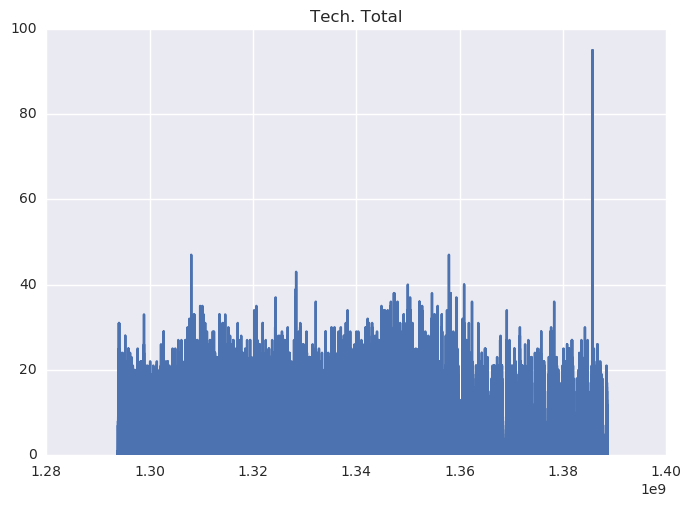

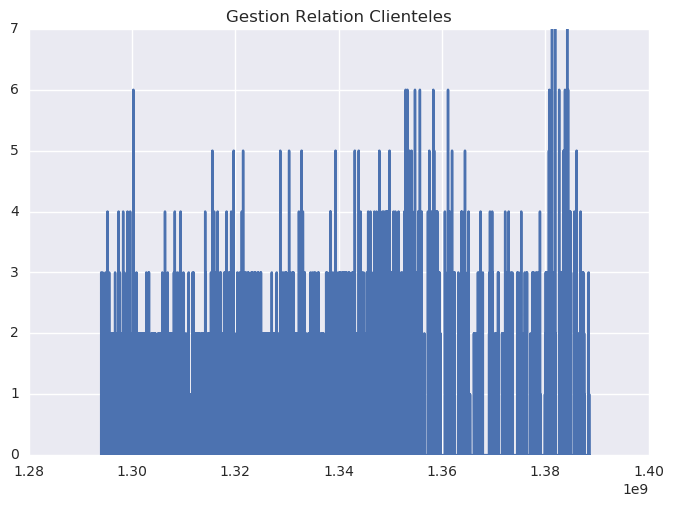

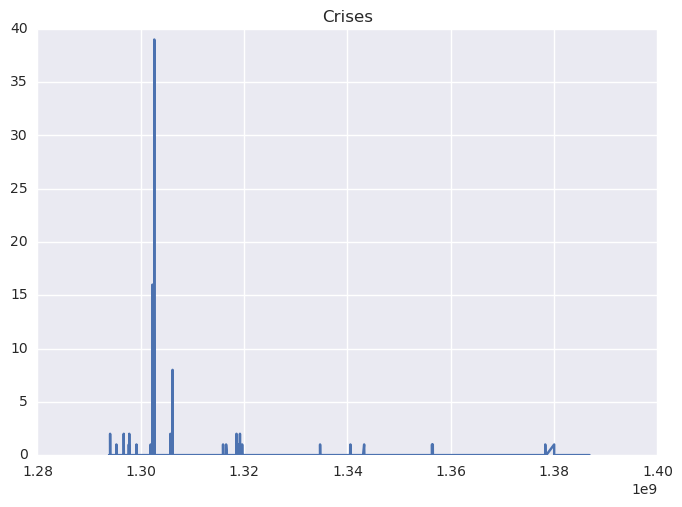

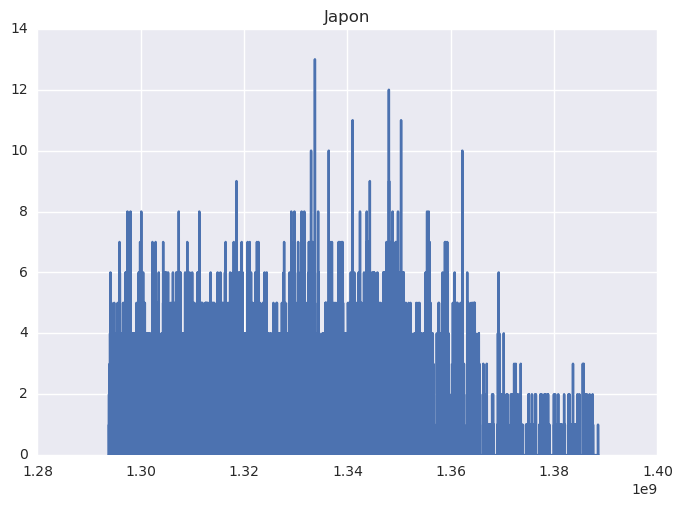

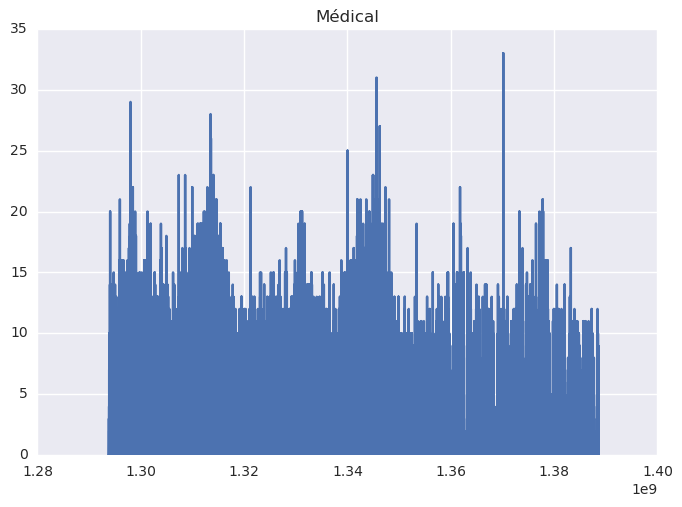

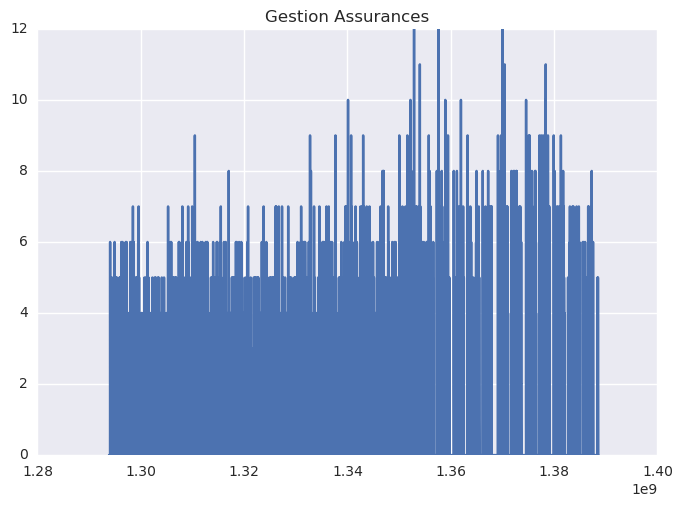

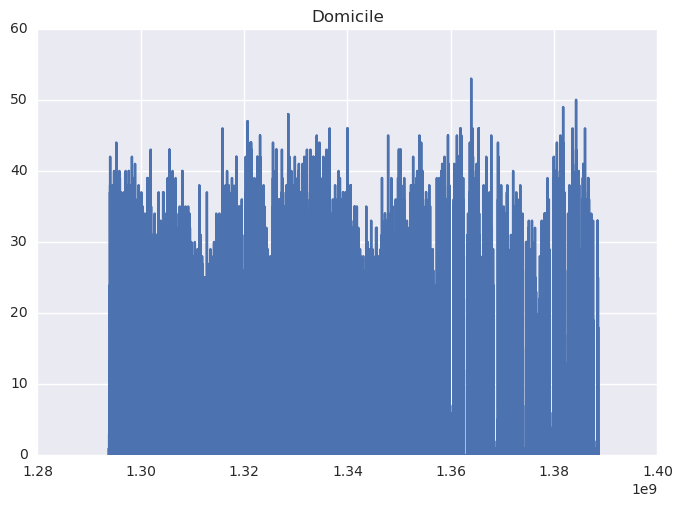

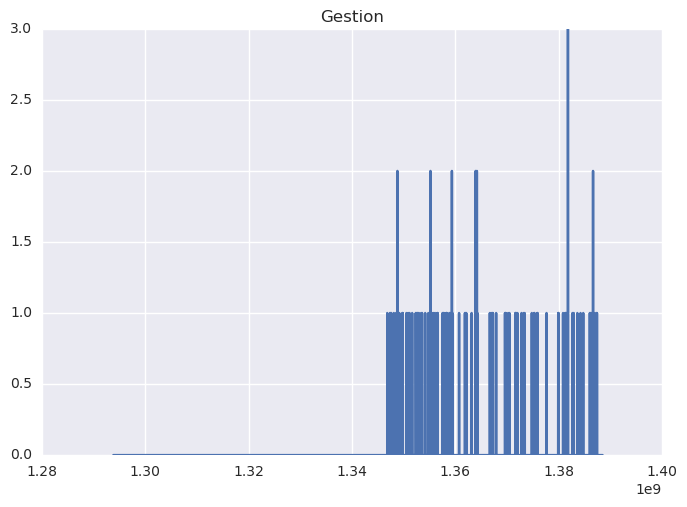

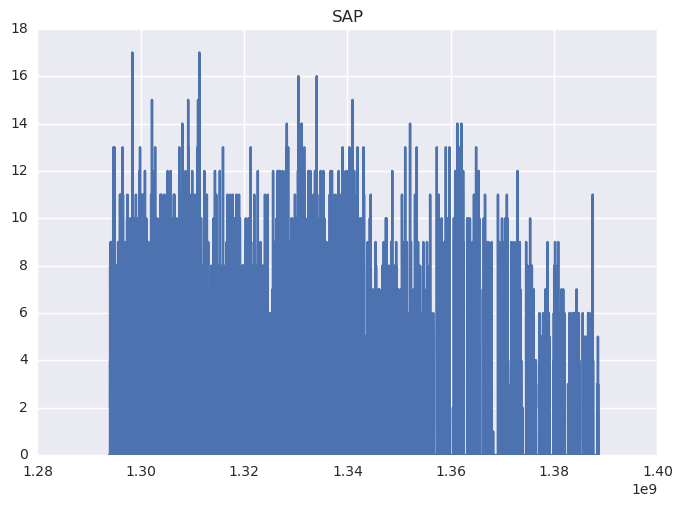

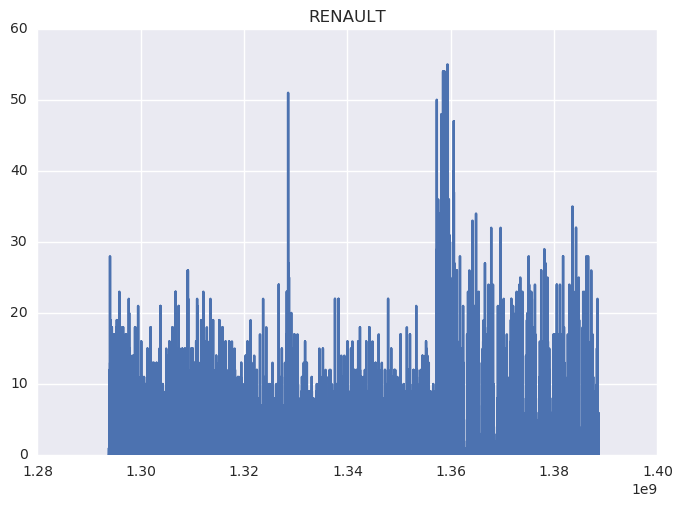

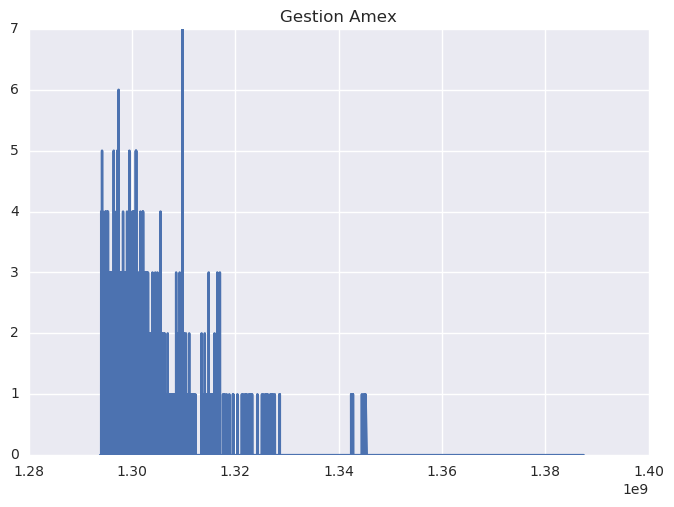

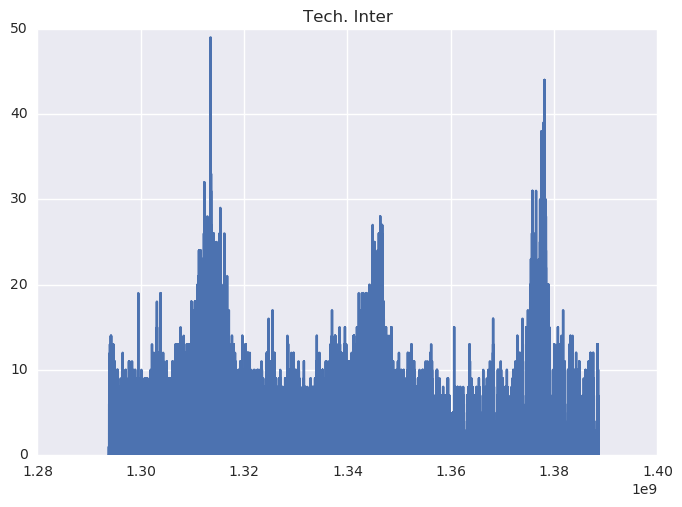

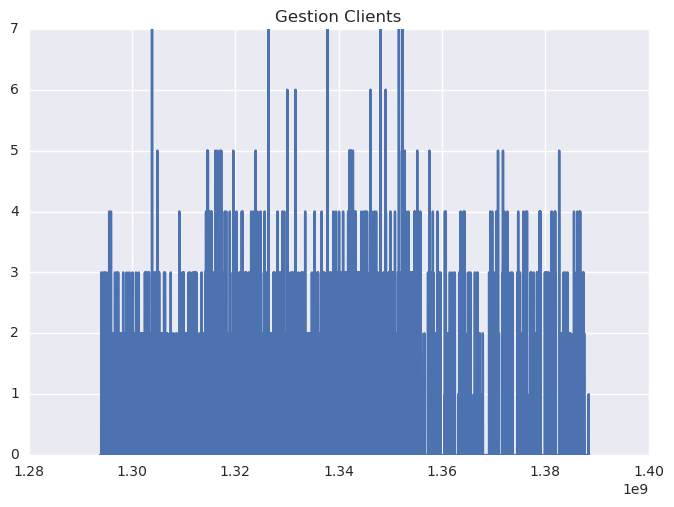

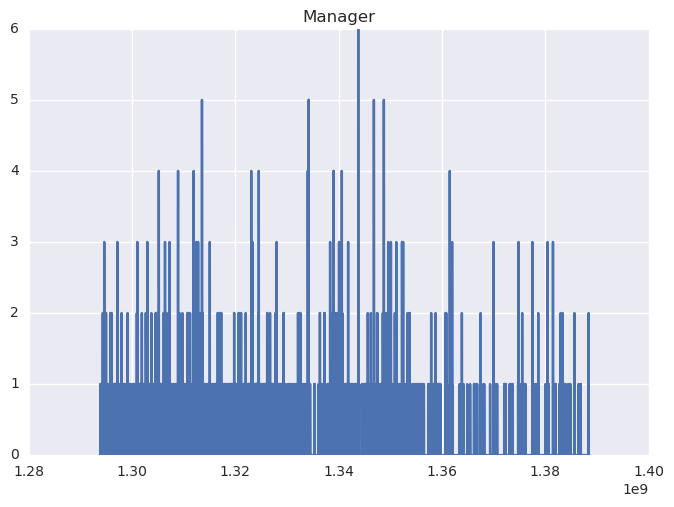

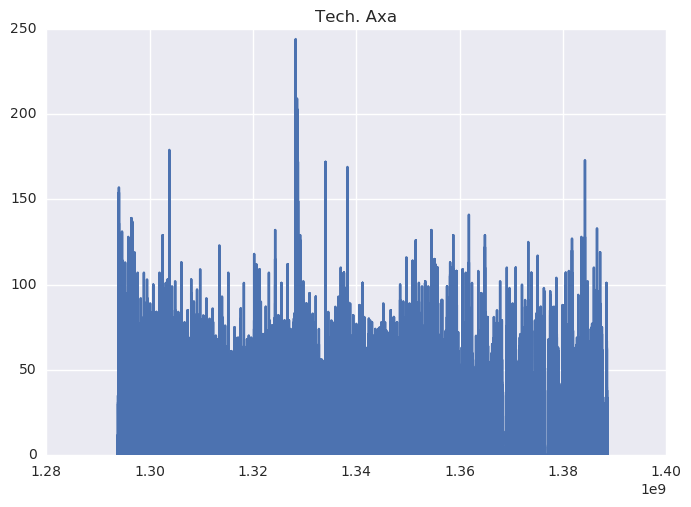

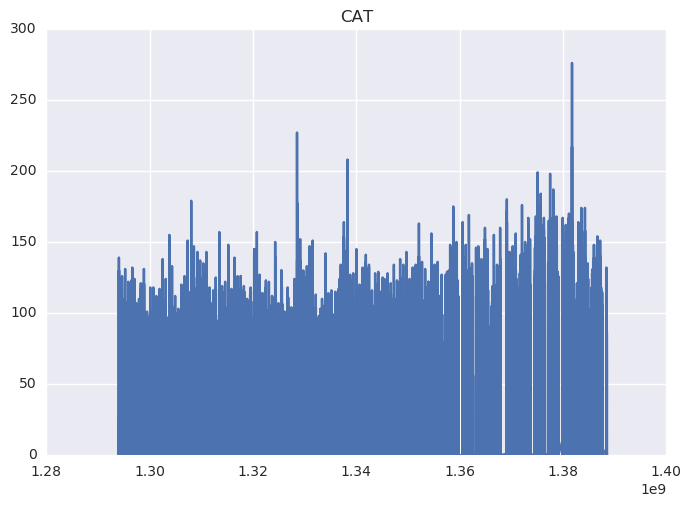

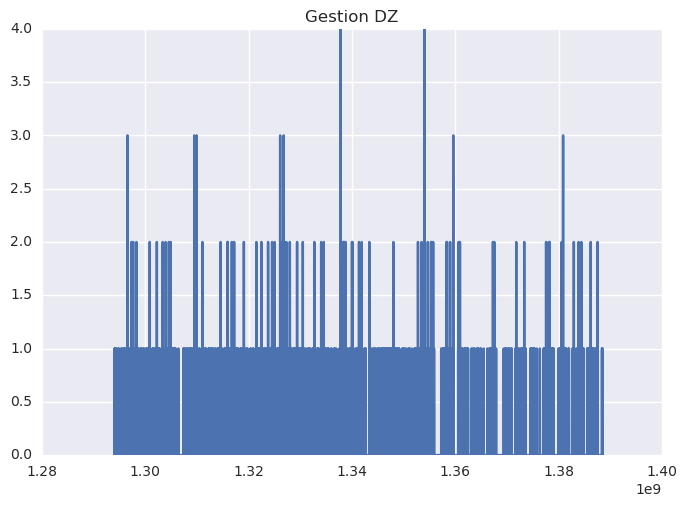

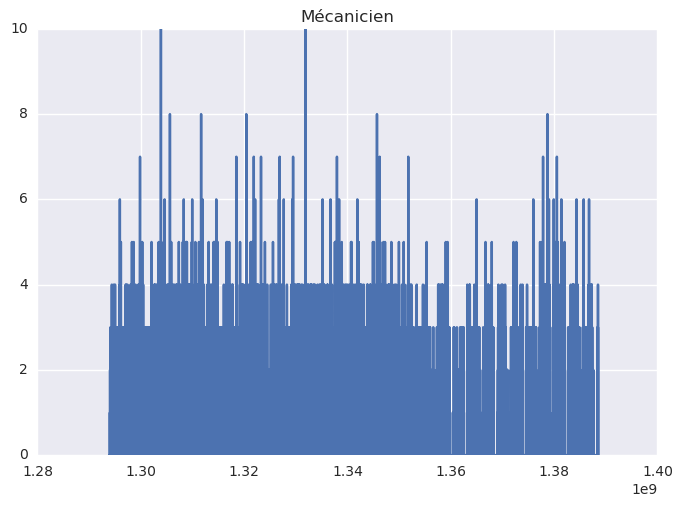

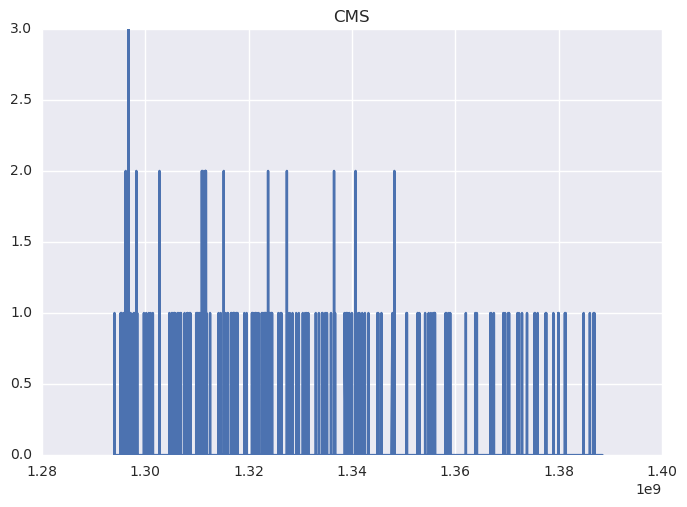

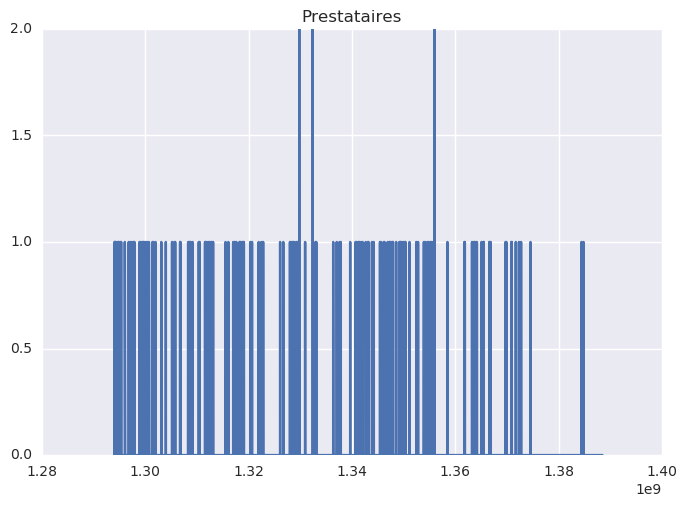

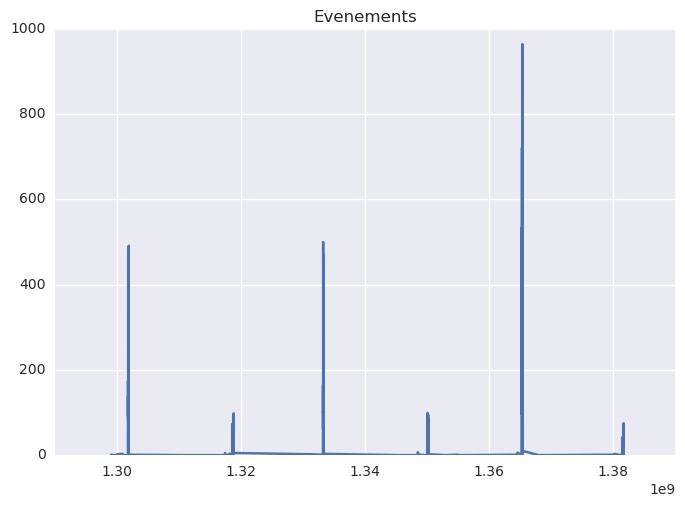

In [147]:
m = data['time_absolut'].max()
for cat in cats:
    data_cat = data[data['ASS_ASSIGNMENT'] == cat].sort(['time_absolut'])
    
    day = 15
#     data_cat = data_cat[data_cat['hours'] == day]
#     data_cat = data_cat[data_cat['time_absolut'] > m - 60*60*24*28]
#     grouped = data_cat.groupby(['hours'])['CSPL_RECEIVED_CALLS'].mean()
    plt.plot(data_cat['time_absolut'],data_cat['CSPL_RECEIVED_CALLS'])
    plt.title(cat)
    plt.show()

In [157]:
subm_data['ASS_ASSIGNMENT'].unique()

array(['CMS', 'Crises', 'Domicile', 'Gestion',
       'Gestion - Accueil Telephonique', 'Gestion Assurances',
       'Gestion Relation Clienteles', 'Gestion Renault', 'Japon',
       'Médical', 'Nuit', 'RENAULT', 'Regulation Medicale', 'SAP',
       'Services', 'Tech. Axa', 'Tech. Inter', 'Téléphonie', 'Tech. Total',
       'Mécanicien', 'CAT', 'Manager', 'Gestion Clients', 'Gestion DZ',
       'RTC', 'Prestataires'], dtype=object)

In [282]:
#tech axa
cat = 'CAT'
print(len(data[data['ASS_ASSIGNMENT'] == cat]))
start_time = time.time()
X = data[data['ASS_ASSIGNMENT'] == cat][indexes]
Y = data[data['ASS_ASSIGNMENT'] == cat]['CSPL_RECEIVED_CALLS']
#         model = xgb.XGBRegressor(max_depth=3, learning_rate=0.5, n_estimators=80, silent=False, 
#                                  objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1,
#                                  max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
#                                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)


41206


In [283]:
def scorerMult(est, X, y):
    return np.mean(eval_metric(est.predict(X)*(np.exp(-est.predict(X)/100)*5+1),y))

In [284]:
#         X_train, X_test, y_train, y_test = train_test_split(X,Y)

# --- 0.4
# model = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None,
#                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                       max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
#                       bootstrap=True, oob_score=False, n_jobs=-1,
#                       random_state=None, verbose=0, warm_start=False)

model = xgb.XGBRegressor(max_depth=3, learning_rate=0.9, n_estimators=100, silent=False, 
                         objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1,
                         max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
                         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
        

# model = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None,
#                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                       max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
#                       bootstrap=True, oob_score=False, n_jobs=-1,
#                       random_state=None, verbose=0, warm_start=False)

#         model.fit(X,Y)
scores = cross_val_score(model,X,Y,scoring=scorerMult,cv=5)
print(scores)

[  1.79498203e+01   1.31675550e+17   8.23231755e+01   8.93702657e+00
   1.30174998e+01]


In [266]:
cat = 'Tech. Axa'
print(len(data[data['ASS_ASSIGNMENT'] == cat]))
start_time = time.time()
X = data[data['ASS_ASSIGNMENT'] == cat][indexes]
Y = data[data['ASS_ASSIGNMENT'] == cat]['CSPL_RECEIVED_CALLS']
#         model = xgb.XGBRegressor(max_depth=3, learning_rate=0.5, n_estimators=80, silent=False, 
#                                  objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1,
#                                  max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
#                                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)


416986


In [ ]:
[  3.49275059   6.96753244   7.29661279  11.69029872   4.17214527
   4.29744128   6.72934037   5.81668682   5.03439829   5.32960201]

In [274]:
def scorerMult2(est, X, y):
    return np.mean(eval_metric(est.predict(X)*(np.exp(-est.predict(X)/100)*10+1),y))

model = RandomForestRegressor(n_estimators=200, criterion='mse', max_depth=None,
                      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                      max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                      bootstrap=True, oob_score=False, n_jobs=-1,
                      random_state=None, verbose=0, warm_start=False)

#         model.fit(X,Y)
scores = cross_val_score(model,X,Y,scoring=scorerMult2,cv=10)
print(scores)

[ 3.49931328  6.9842676   7.30146076  8.49857923  4.17225472  4.31965288
  6.6513589   5.83673784  5.07396172  5.27543413]


In [288]:
cat = 'Téléphonie'
print(len(data[data['ASS_ASSIGNMENT'] == cat]))
start_time = time.time()

dat = data[data['ASS_ASSIGNMENT'] == cat]
dat = dat[dat['year'] == 2013]
print(len(dat))

X = dat[dat['ASS_ASSIGNMENT'] == cat][indexes]
Y = dat[dat['ASS_ASSIGNMENT'] == cat]['CSPL_RECEIVED_CALLS']
#         model = xgb.XGBRegressor(max_depth=3, learning_rate=0.5, n_estimators=80, silent=False, 
#                                  objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1,
#                                  max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
#                                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)


7387175
4239116


In [ ]:
def scorerMult2(est, X, y):
    return np.mean(eval_metric(est.predict(X)*(np.exp(-est.predict(X)/20)*10+1),y))

model = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None,
                      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                      max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                      bootstrap=True, oob_score=False, n_jobs=-1,
                      random_state=None, verbose=0, warm_start=False)

#         model.fit(X,Y)
scores = cross_val_score(model,X,Y,scoring=scorerMult2,cv=6)
print(scores)

In [225]:
def scorerIra(est, X, y):
    y_pred = y
    y_pred = model_Tech_Axa(0)
    return np.mean(eval_metric(y_pred,y))
scores = cross_val_score(model,X,Y,scoring=scorerIra)

In [226]:
print(scores)

[  8.23397160e+06   4.38820070e+08   5.11069395e+10]


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


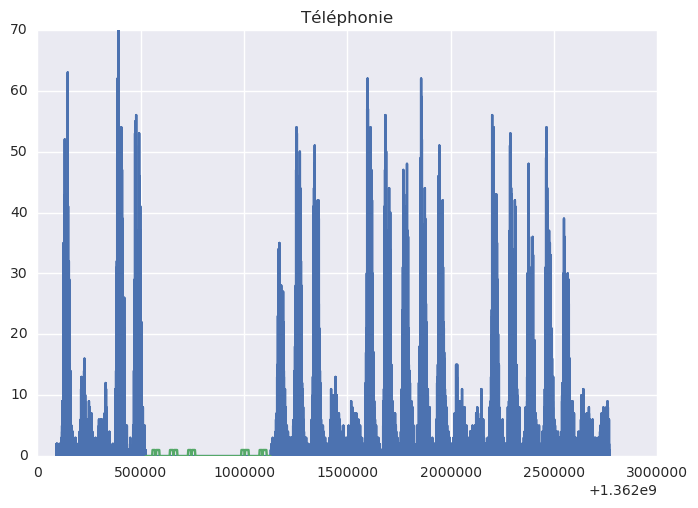

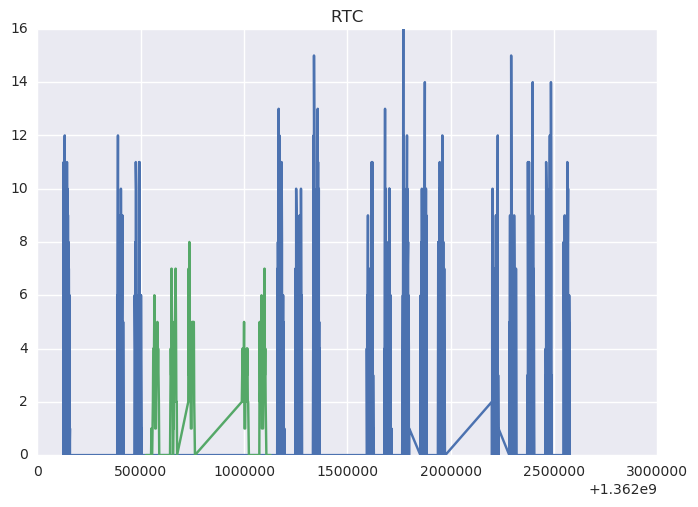

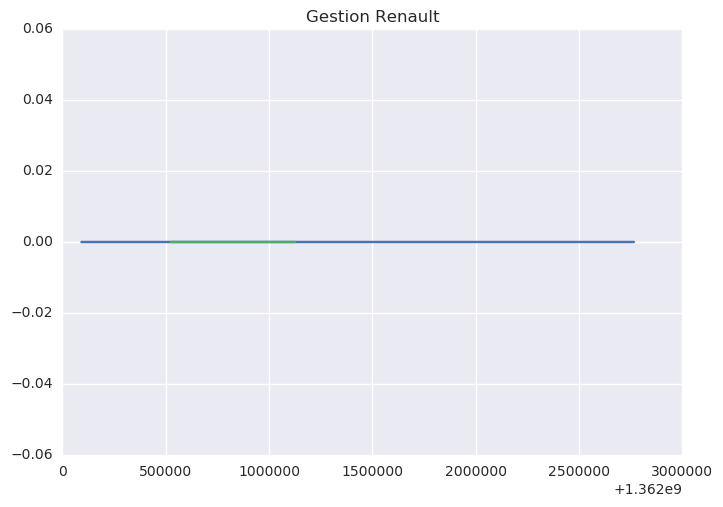

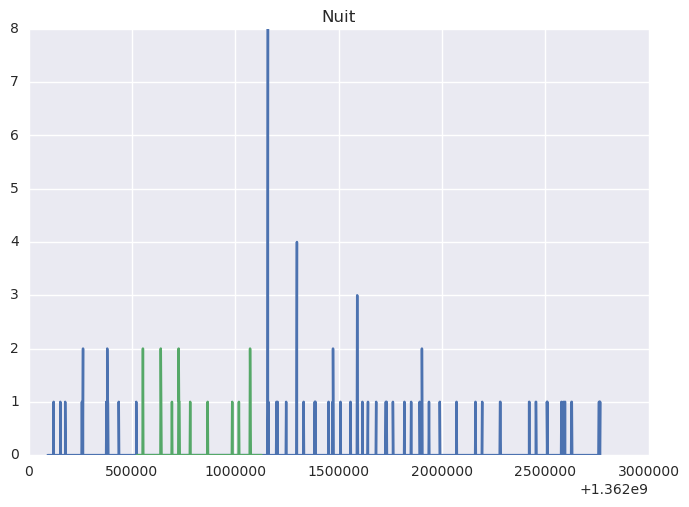

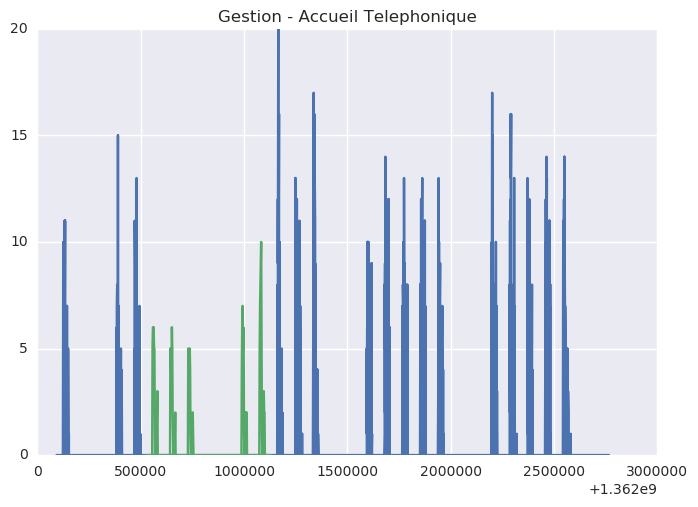

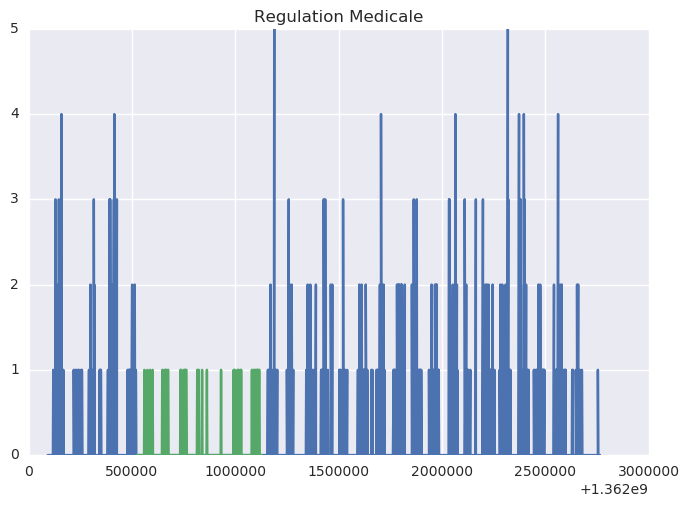

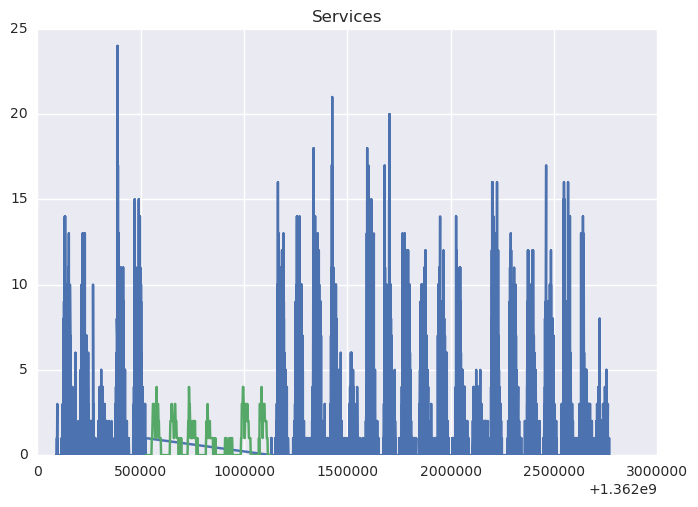

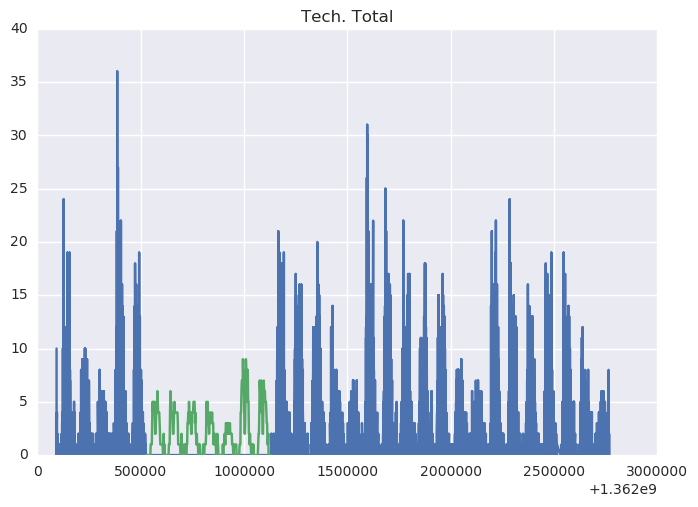

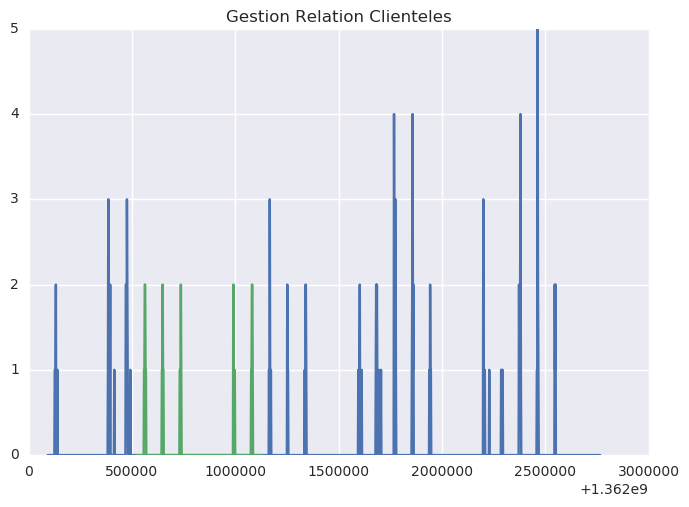

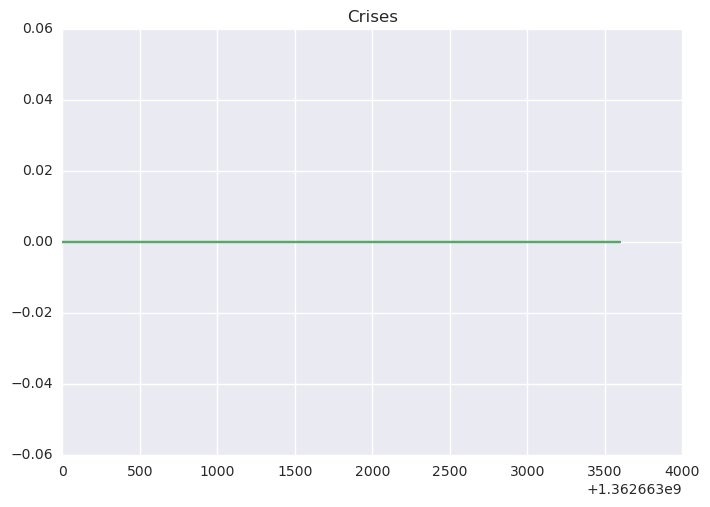

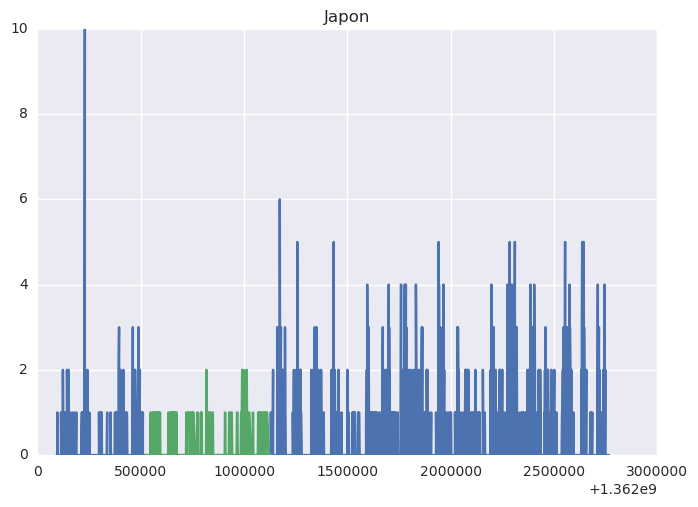

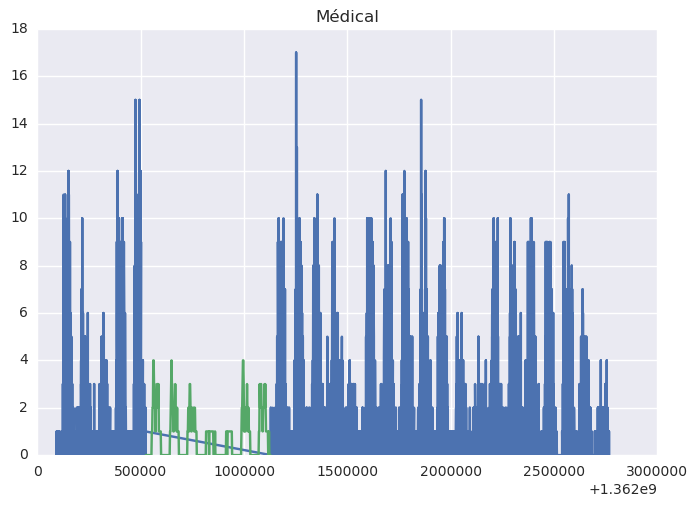

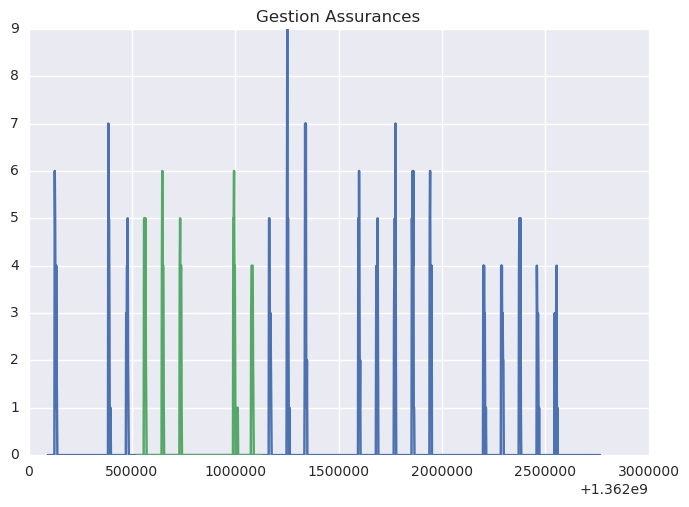

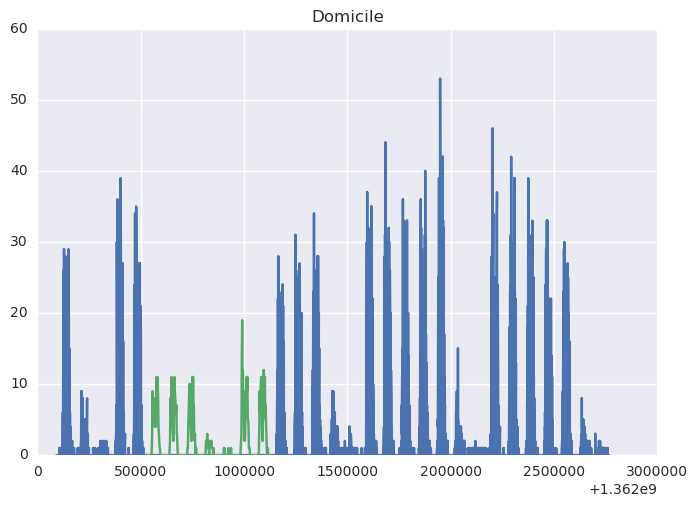

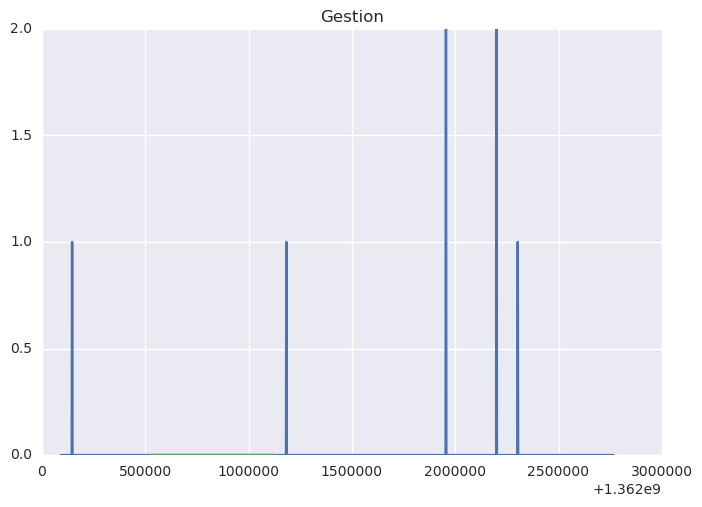

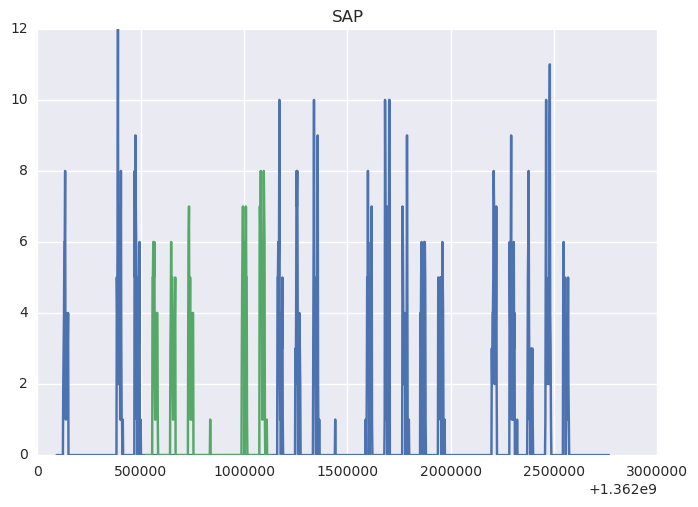

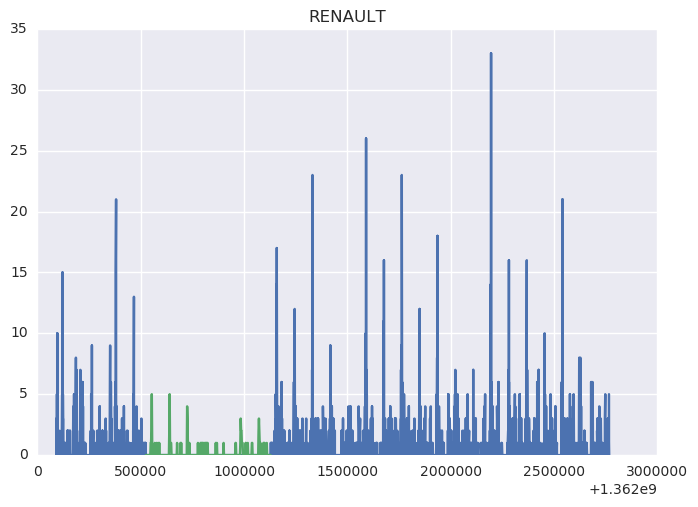

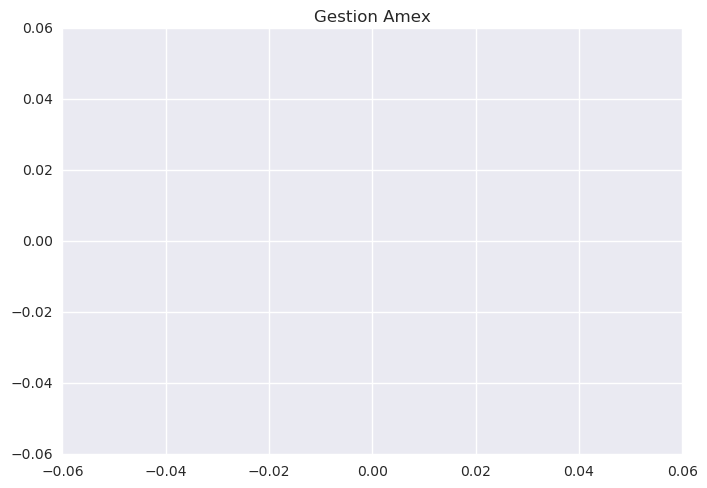

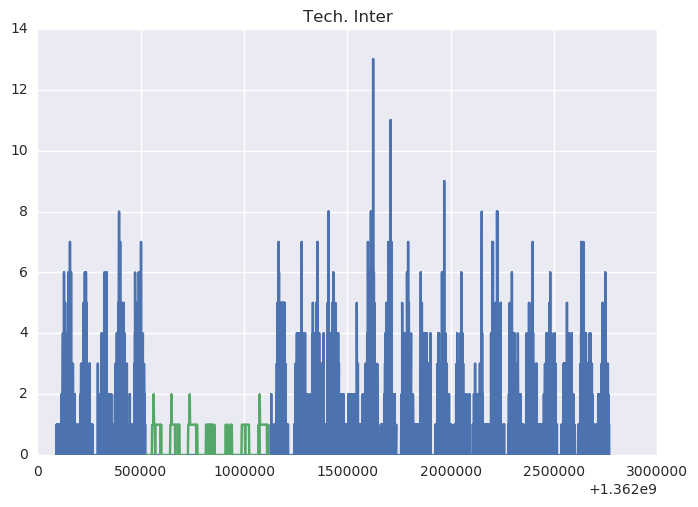

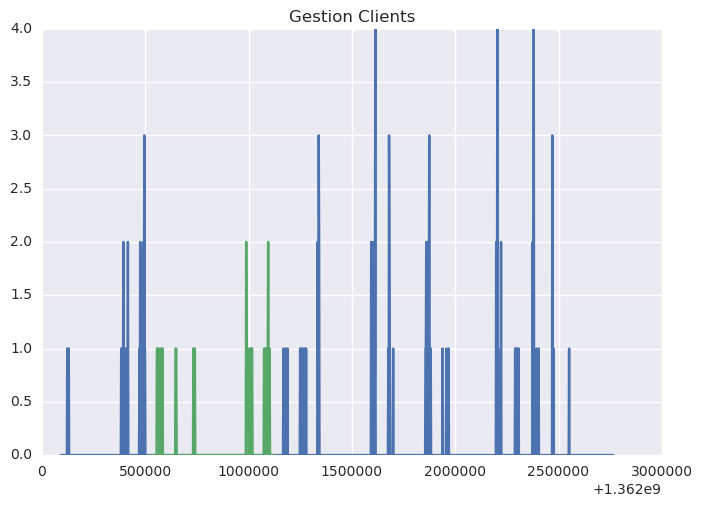

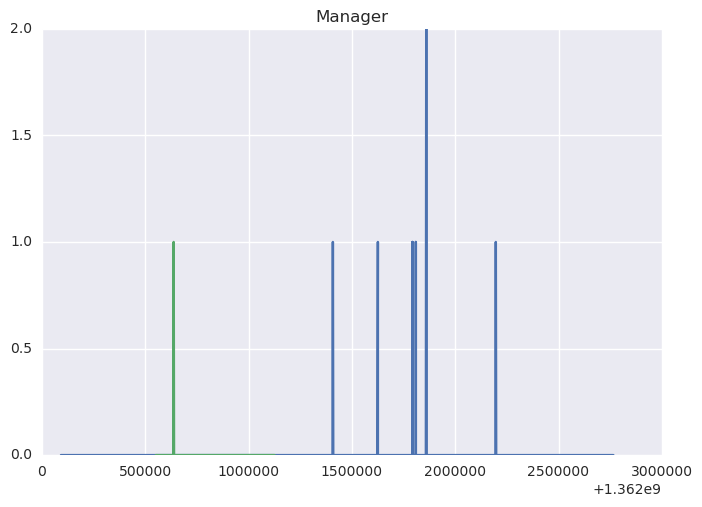

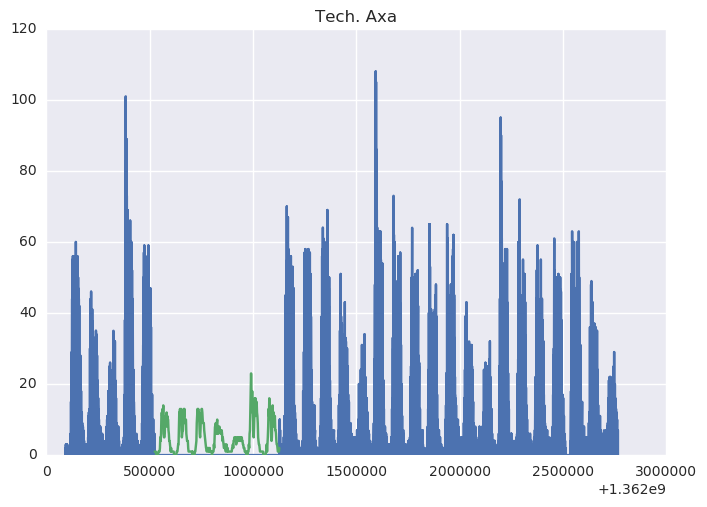

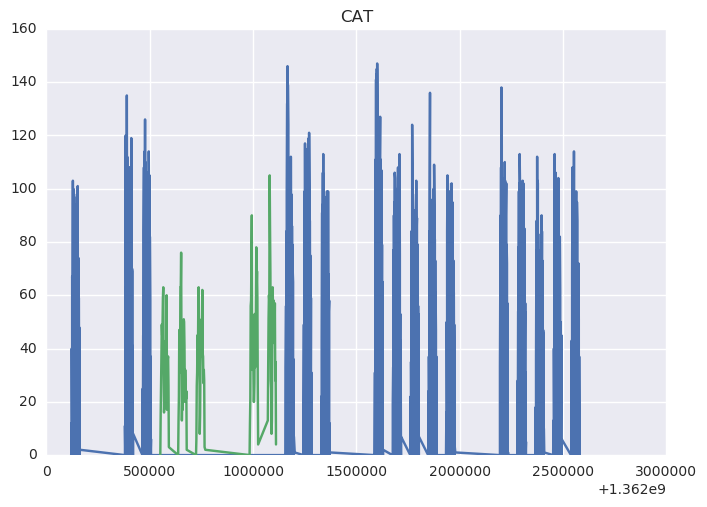

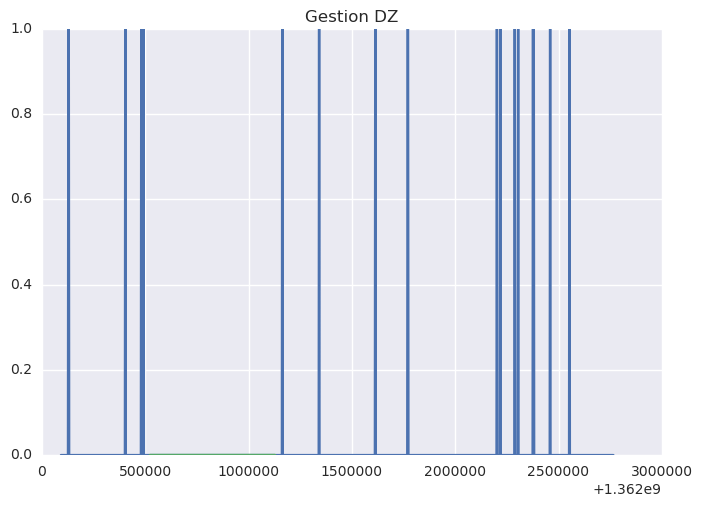

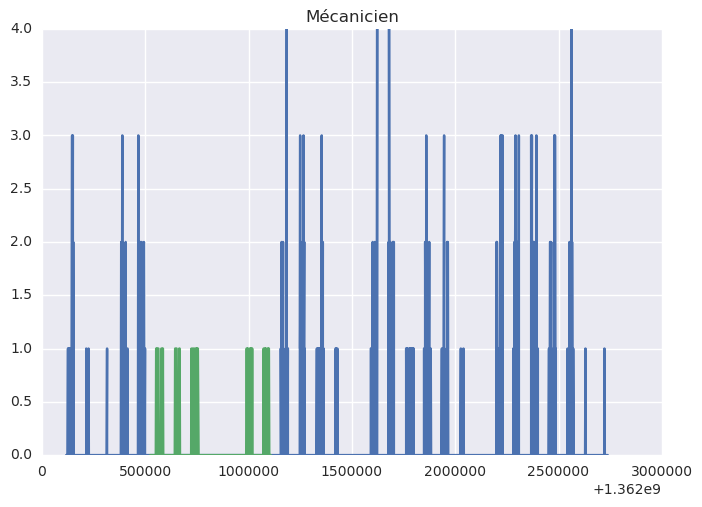

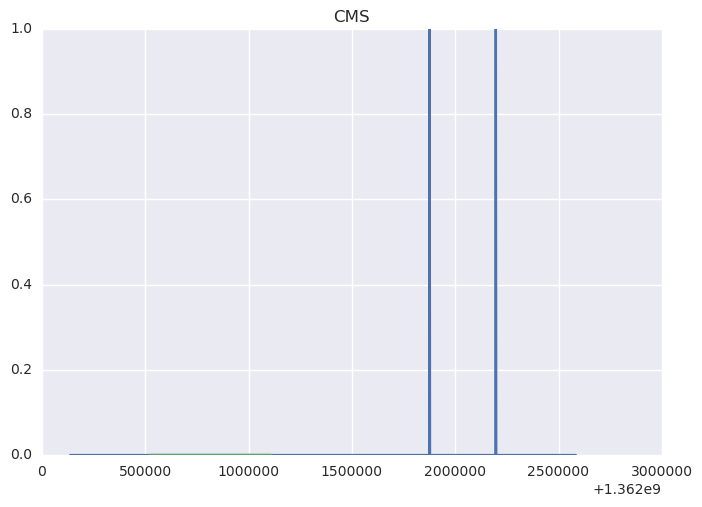

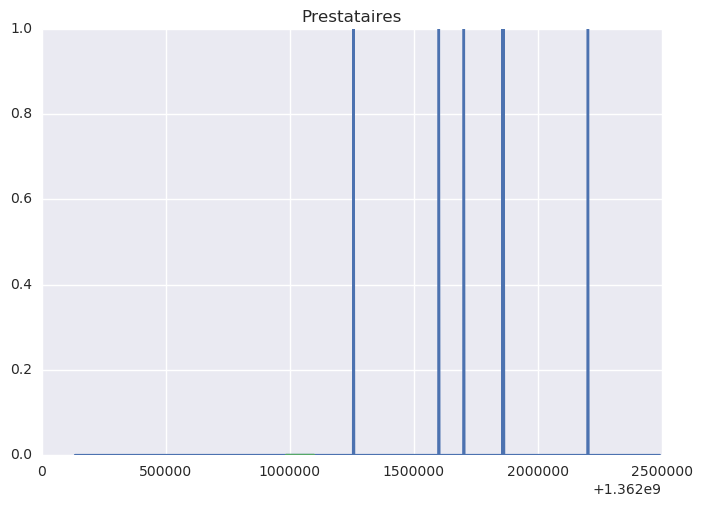

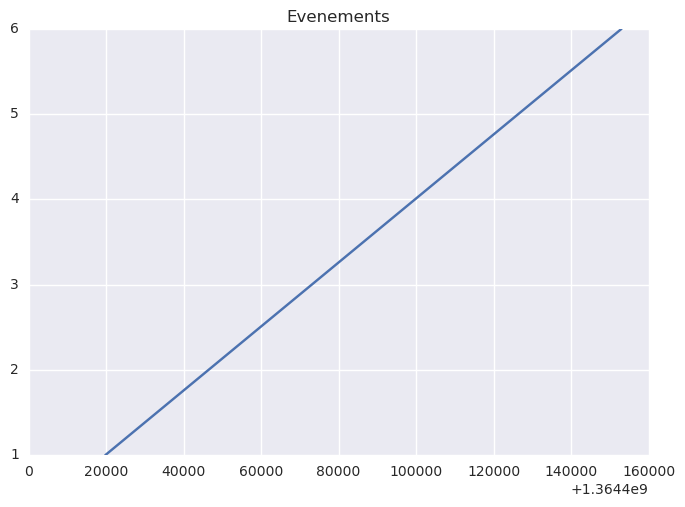

In [186]:
m = data['time_absolut'].max()
for cat in cats:
    data_cat = data[data['ASS_ASSIGNMENT'] == cat].sort(['time_absolut'])
    day = 15
    data_cat = data_cat[data_cat['year'] == 2013]
    data_cat = data_cat[data_cat['month'] == 3]
#     data_cat = data_cat[data_cat['time_absolut'] > m - 60*60*24*28]
#     grouped = data_cat.groupby(['hours'])['CSPL_RECEIVED_CALLS'].mean()
    plt.plot(data_cat['time_absolut'],data_cat['CSPL_RECEIVED_CALLS'])
    
    
    data_cat = subm_data[subm_data['ASS_ASSIGNMENT'] == cat].sort(['time_absolut'])
    day = 15
    data_cat = data_cat[data_cat['year'] == 2013]
    data_cat = data_cat[data_cat['month'] == 3]
#     data_cat = data_cat[data_cat['time_absolut'] > m - 60*60*24*28]
#     grouped = data_cat.groupby(['hours'])['CSPL_RECEIVED_CALLS'].mean()
    plt.plot(data_cat['time_absolut'],data_cat['prediction'])
    
    
    plt.title(cat)
    plt.show()

In [113]:
data_cat = data[data['ASS_ASSIGNMENT'] == 'Crises']
# data_cat = data_cat[data_cat['time_absolut'] > m - 60*60*24*360]
data_cat['CSPL_RECEIVED_CALLS']

0          0
19         0
37         0
55         0
73         0
92         0
111        0
130        0
149        0
168        0
187        0
207        0
227        0
246        0
265        0
285        0
385        0
406        0
427        0
448        0
469        0
490        0
511        0
532        0
553        0
574        0
595        0
616        0
637        0
658        0
          ..
939855     0
941534     0
941557     0
941580     0
941605     0
941630     0
941655     0
941680     0
941705     0
941730     0
941755     0
941780     0
941805     0
941830     0
941855     0
941880     0
941905     0
941930     0
941955     0
952792     1
952818     0
1017755    0
1017781    0
1017807    0
1017833    0
1017859    0
1017885    0
1017911    0
1017937    0
1017963    0
Name: CSPL_RECEIVED_CALLS, dtype: int64

/home/alogins/.local/lib/python3.4/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


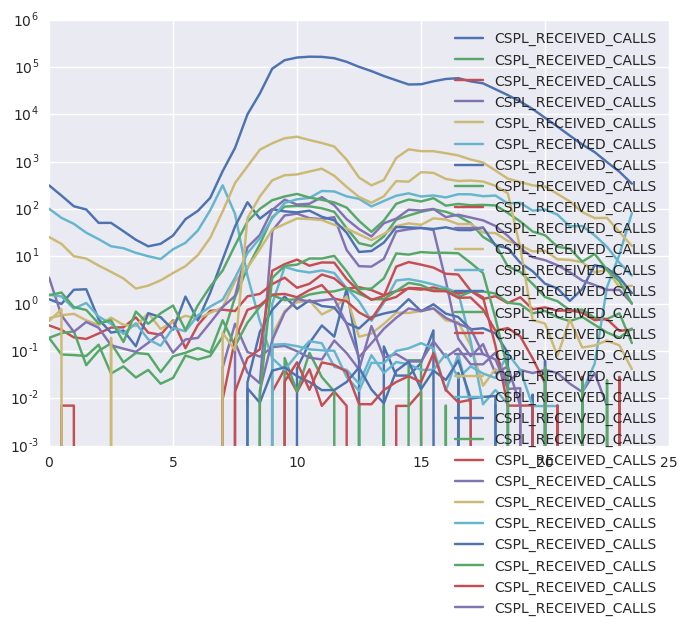

In [78]:
for cat in cats:
    plt.gca().set_yscale("log", nonposy='clip')
    data_cat = data[data['ASS_ASSIGNMENT'] == cat]
    day = 1
    data_cat = data_cat[data_cat['day_week'] == day]
    grouped = data_cat.groupby(['hours'])['CSPL_RECEIVED_CALLS'].var()
    plt.plot(grouped)
    plt.legend()

Берем последние N значений, потому что для записей, где значений очень много - там бессмысленно брать значения аля год назад, потому что надо предсказать всего на неделю, а данных - за 3 года. тренды в некоторых (я посмотрел) совершенно отличаются в последний год, что может портить статистику.

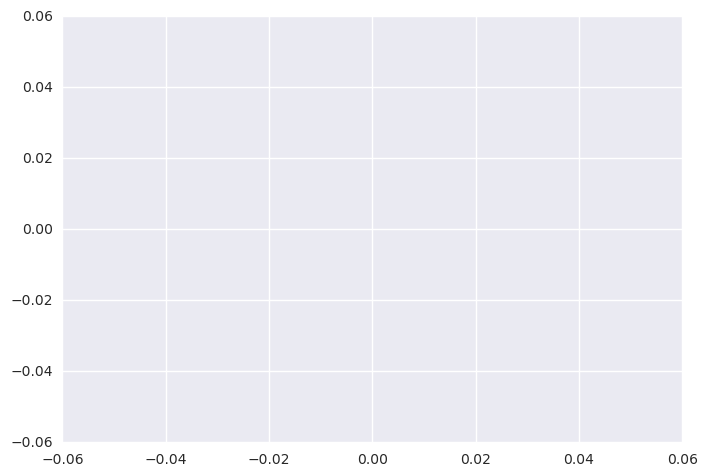

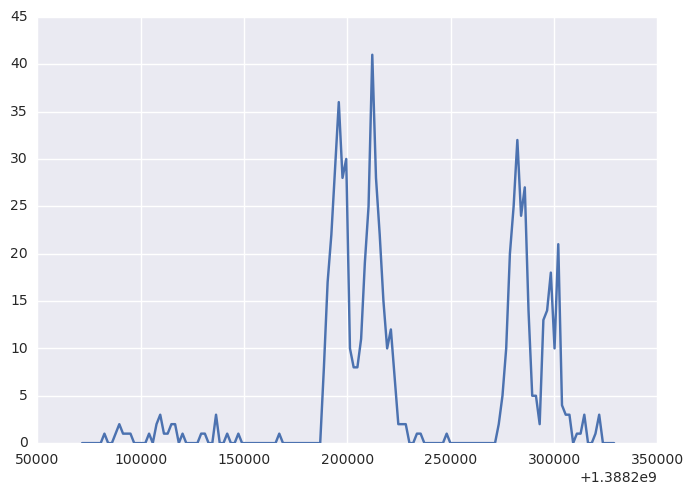

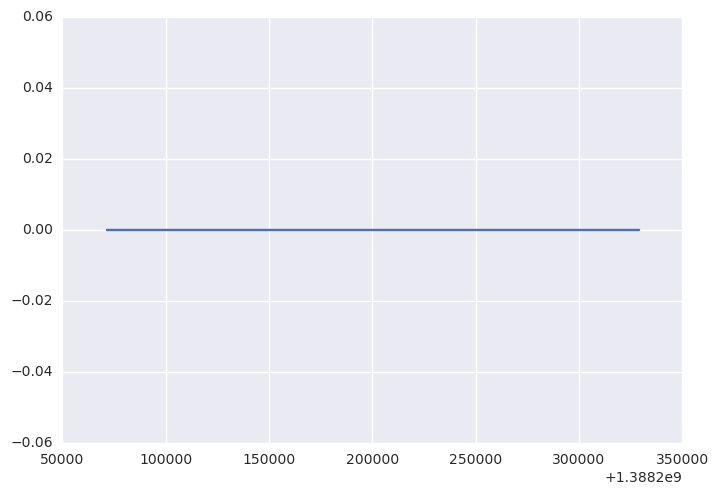

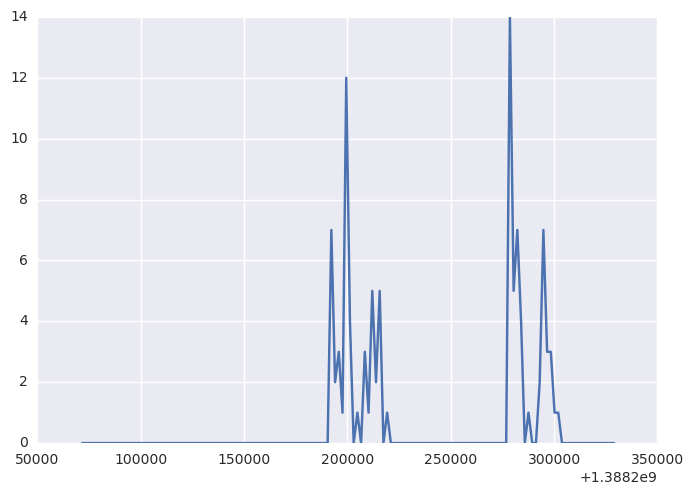

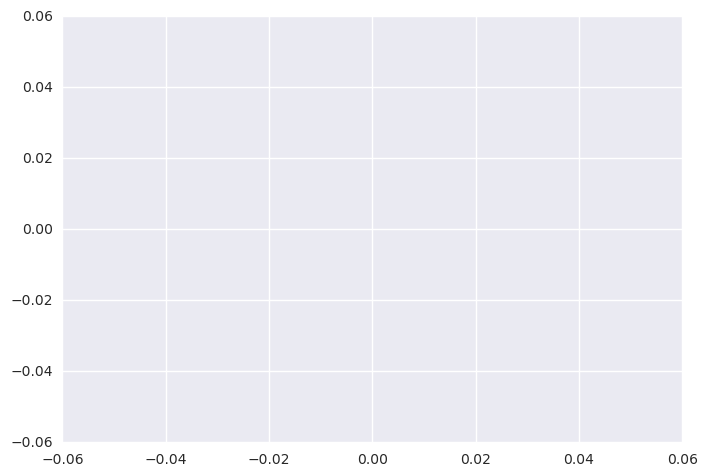

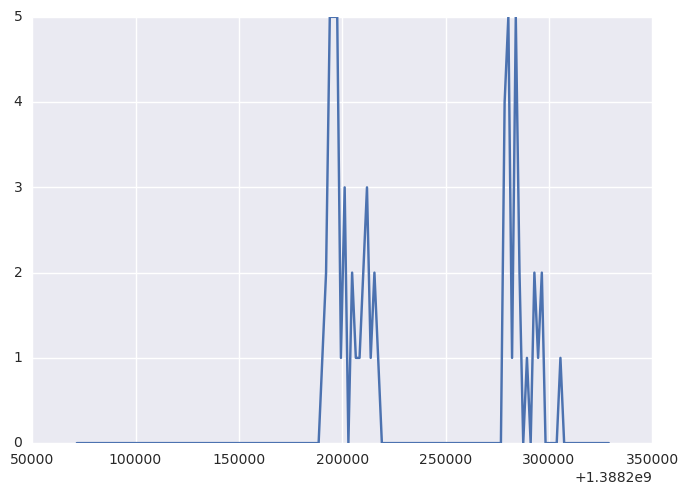

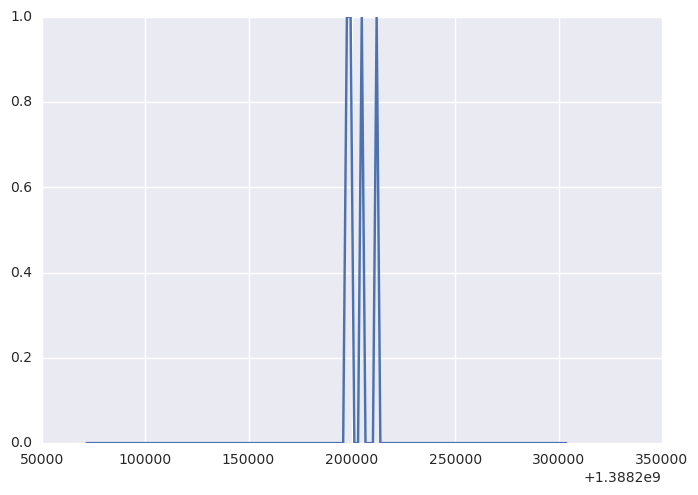

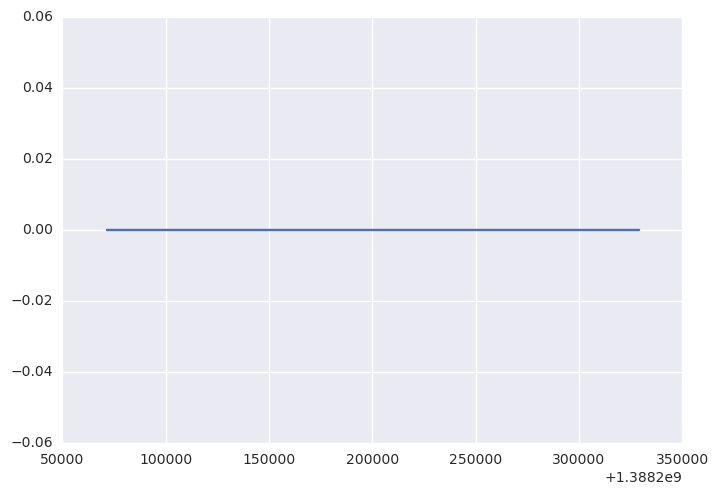

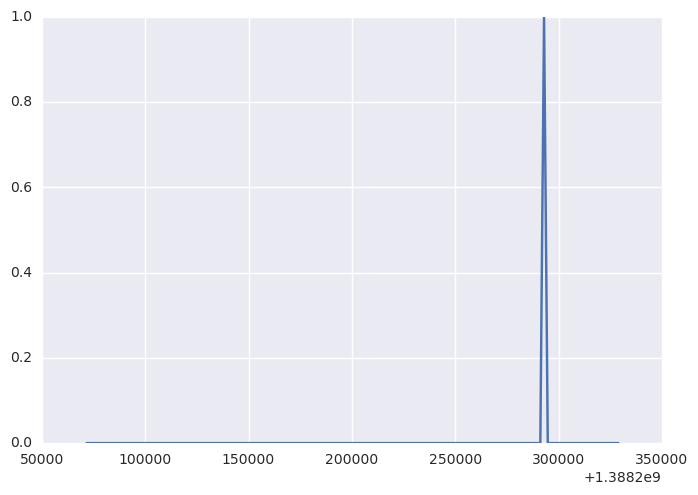

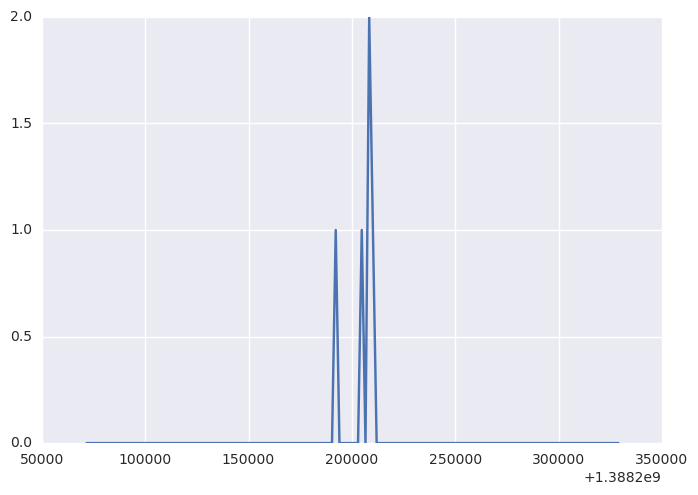

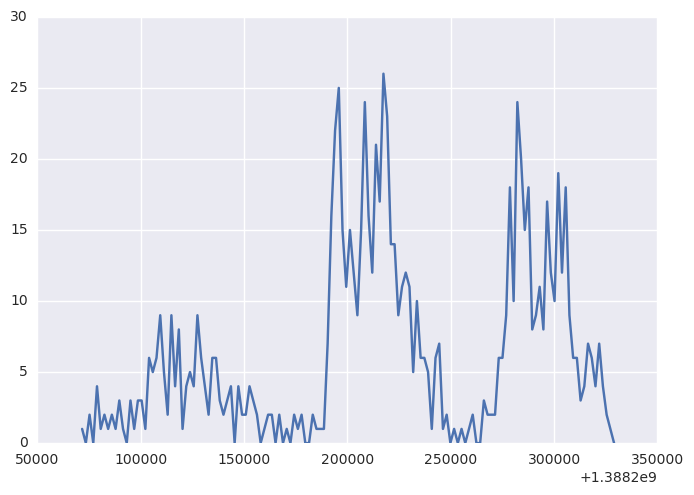

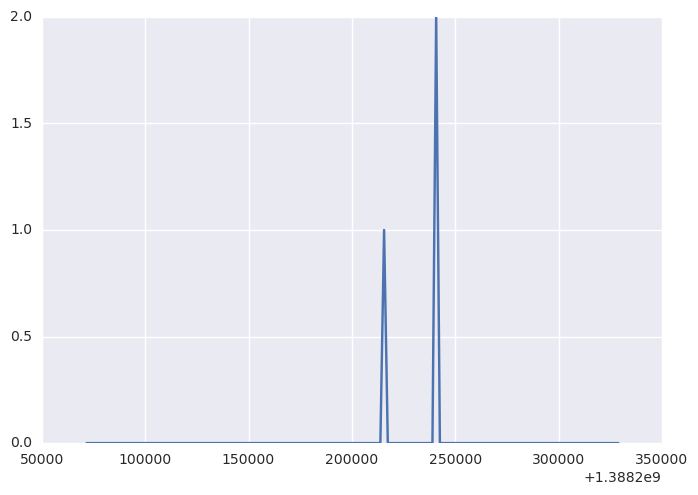

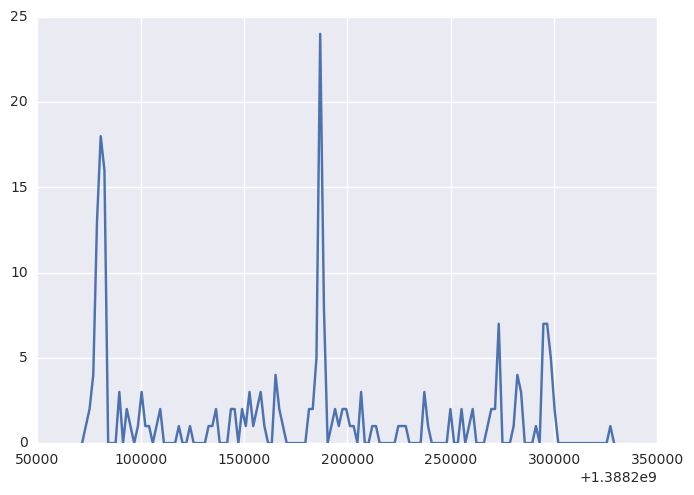

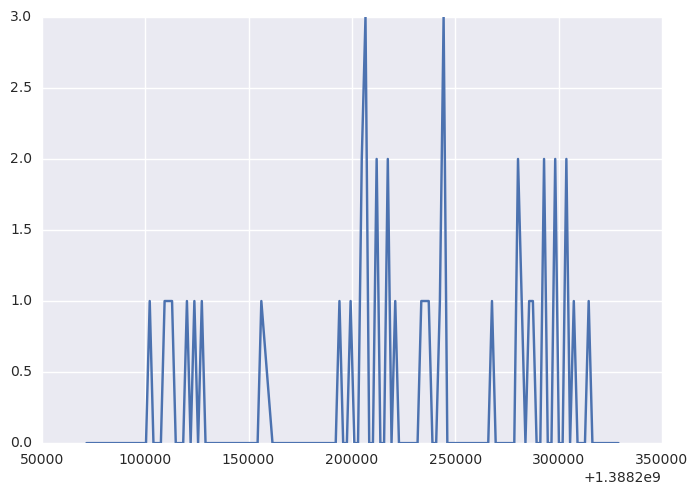

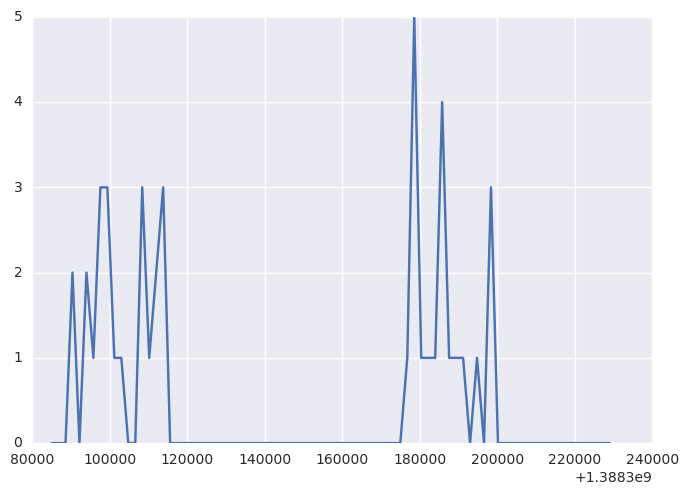

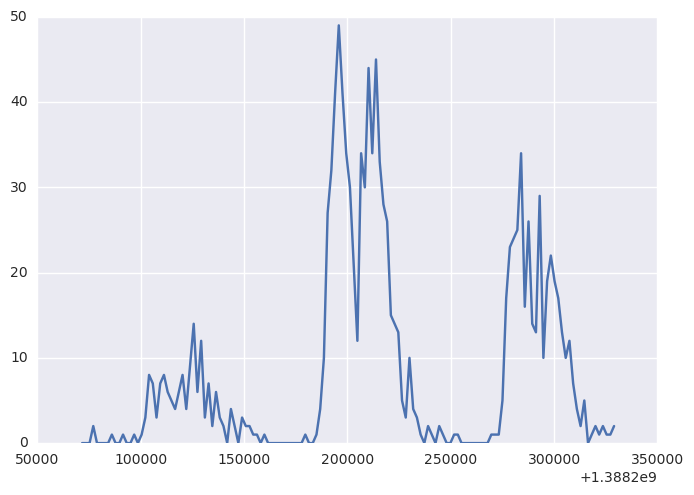

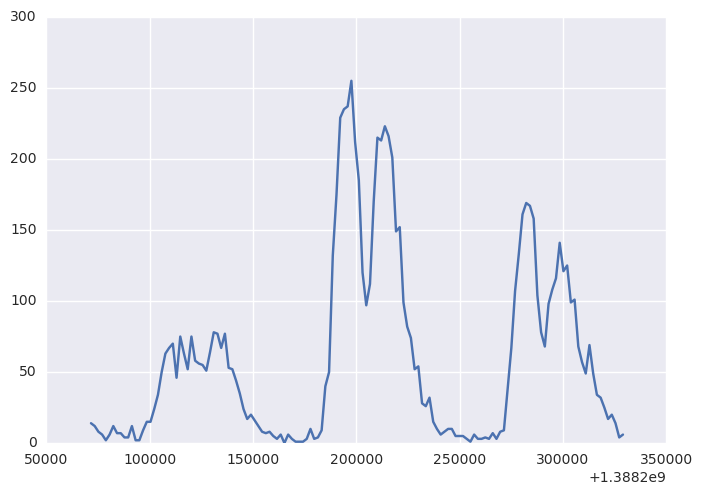

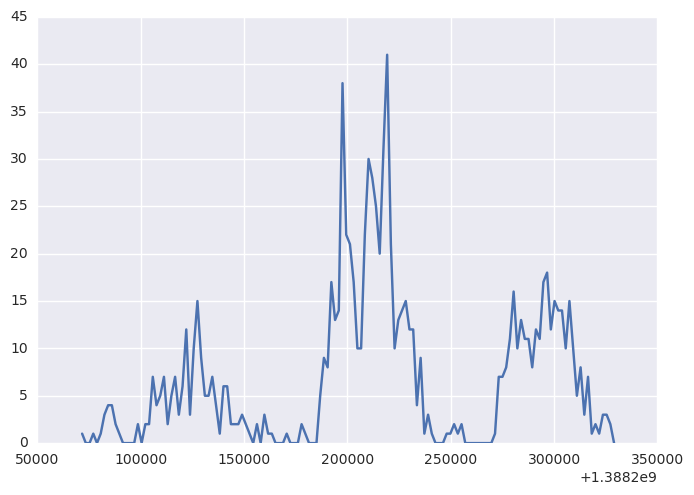

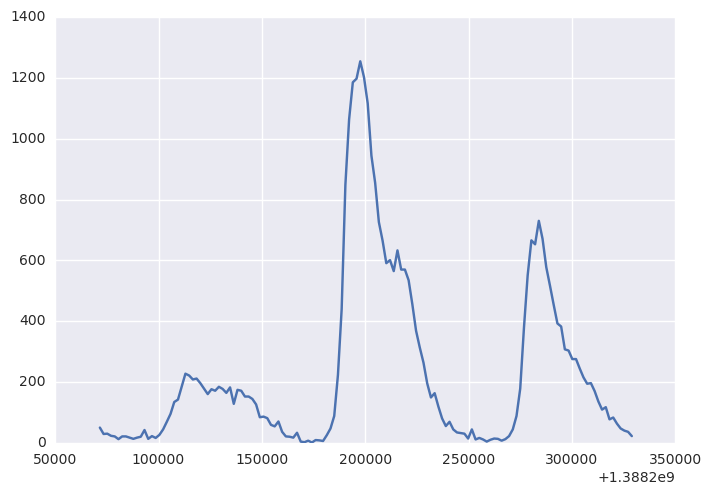

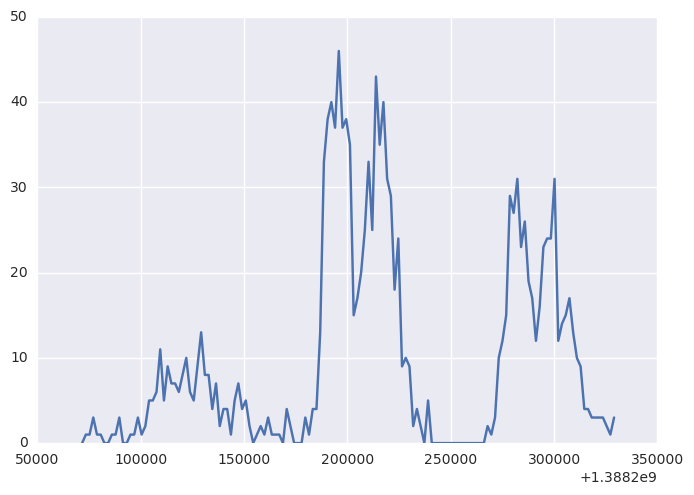

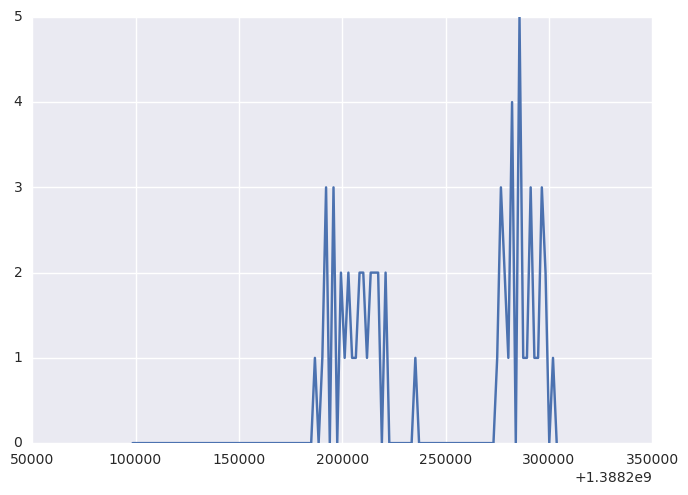

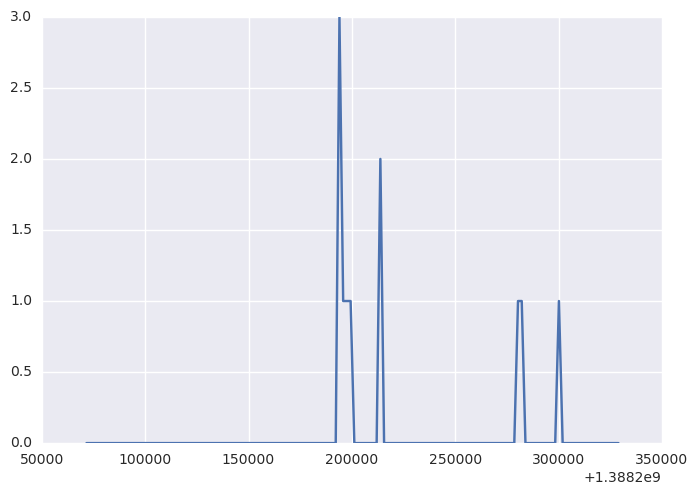

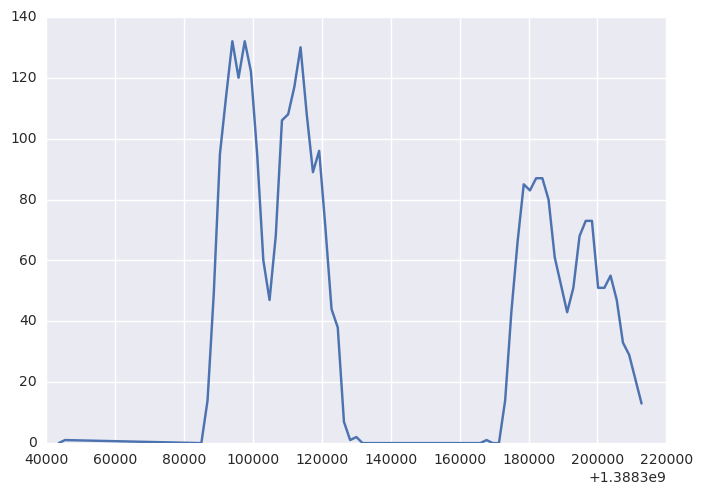

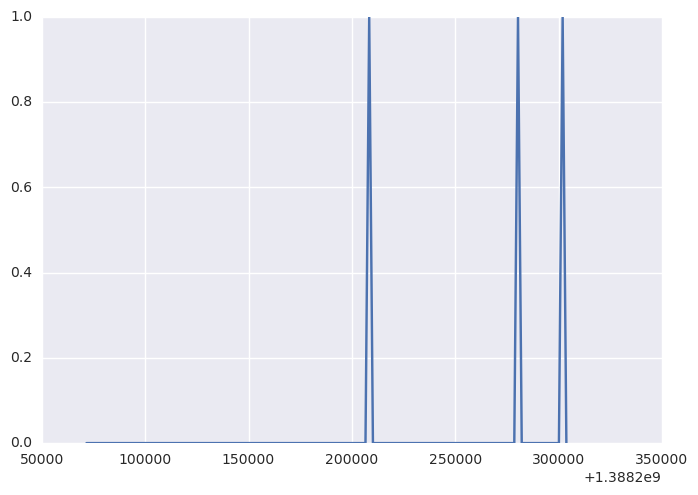

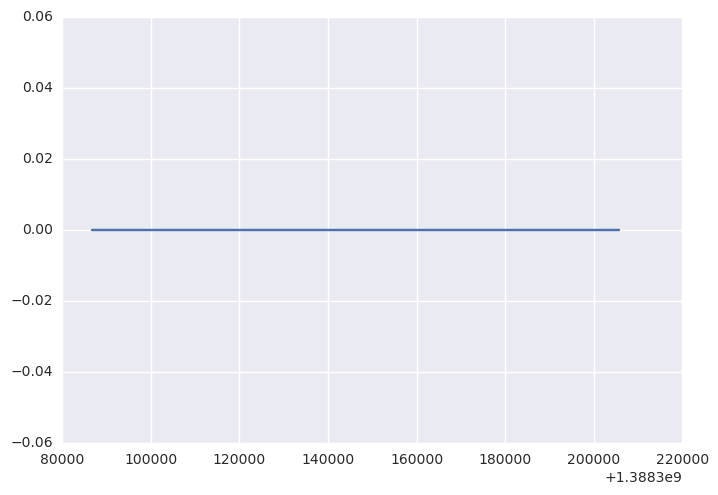

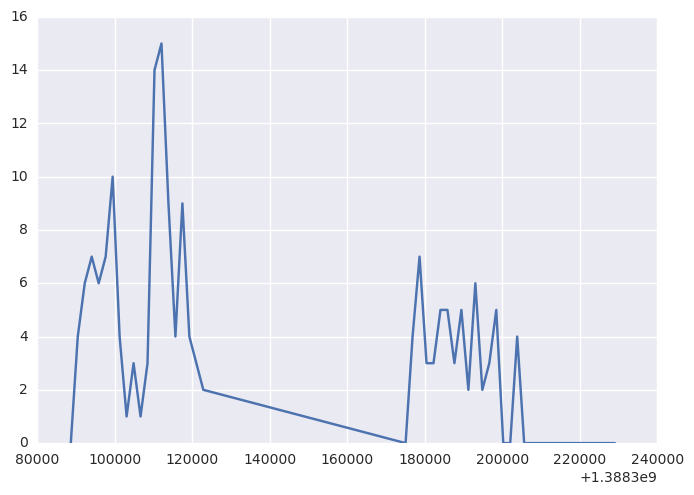

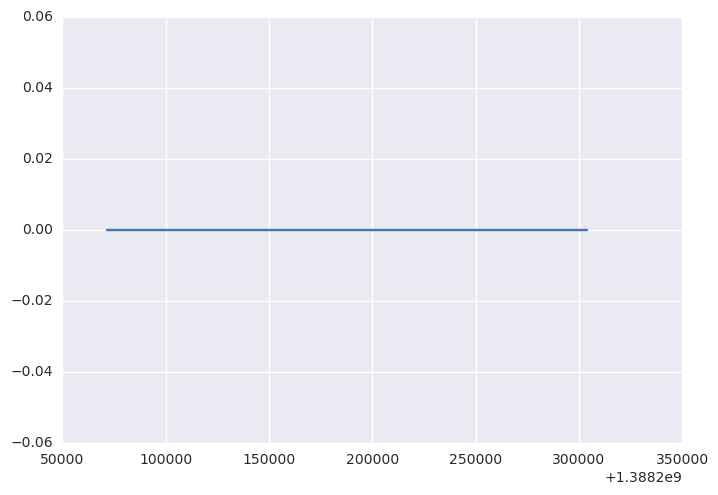

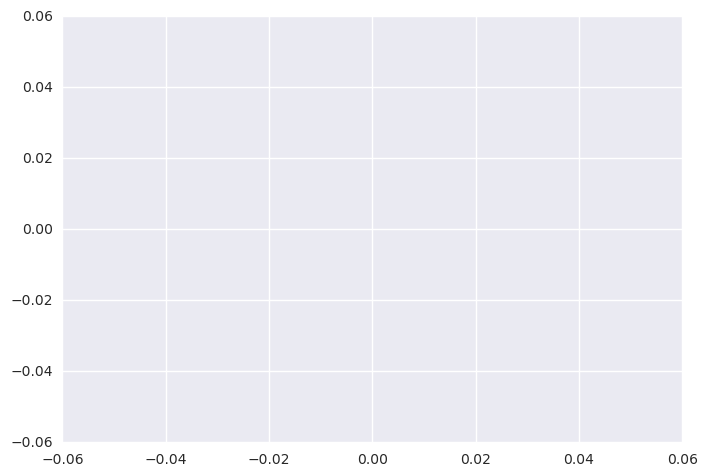

In [94]:
m = data['time_absolut'].max()
for cat in cats:
    data_cat = data[data['ASS_ASSIGNMENT'] == cat]
    day = 15
    data_cat = data_cat[data_cat['time_absolut'] > m - 60*60*24*10]
#     grouped = data_cat.groupby(['hours'])['CSPL_RECEIVED_CALLS'].mean()
    plt.plot(data_cat['time_absolut'],data_cat['CSPL_RECEIVED_CALLS'])
    plt.show()

In [55]:
subm_data['ASS_ASSIGNMENT'].unique()

array(['CMS', 'Crises', 'Domicile', 'Gestion',
       'Gestion - Accueil Telephonique', 'Gestion Assurances',
       'Gestion Relation Clienteles', 'Gestion Renault', 'Japon',
       'Médical', 'Nuit', 'RENAULT', 'Regulation Medicale', 'SAP',
       'Services', 'Tech. Axa', 'Tech. Inter', 'Téléphonie', 'Tech. Total',
       'Mécanicien', 'CAT', 'Manager', 'Gestion Clients', 'Gestion DZ',
       'RTC', 'Prestataires'], dtype=object)

 ----- skip ------

In [ ]:
data['year_week'] = data['time'].apply(lambda x: time.strftime("%Y+%U", x))

In [ ]:
### New feature: average over the concrete week for the specific 'ASS_ASSIGNMENT'

d3 = pd.DataFrame(data.groupby(['year_week', 'ASS_ASSIGNMENT'])['CSPL_RECEIVED_CALLS'].mean())

mean_week_ASS_res = d3

d3.reset_index(level=0, inplace=True)
d3.reset_index(level=0, inplace=True)
data = d3.merge(data,on=['year_week','ASS_ASSIGNMENT'])
data = data.rename(index=str,  columns={'CSPL_RECEIVED_CALLS_x' : 'mean_week_ASS'})
data = data.rename(index=str,  columns={'CSPL_RECEIVED_CALLS_y' : 'CSPL_RECEIVED_CALLS'})

In [ ]:
### New feature: average over all the dates for the specific category and time

d1 = pd.DataFrame(data.groupby(['hours', 'ASS_ASSIGNMENT'])['CSPL_RECEIVED_CALLS'].mean())

mean_calls_time_ASS_res = d1

d1.reset_index(level=0, inplace=True)
d1.reset_index(level=0, inplace=True)
data = d1.merge(data,on=['hours','ASS_ASSIGNMENT'])
data = data.rename(index=str,  columns={'CSPL_RECEIVED_CALLS_x' : 'mean_calls_time_ASS'})
data = data.rename(index=str,  columns={'CSPL_RECEIVED_CALLS_y' : 'CSPL_RECEIVED_CALLS'})

In [ ]:
### New feature: average over all the dates for the specific time

d2 = pd.DataFrame(data.groupby(['hours'])['CSPL_RECEIVED_CALLS'].mean())

mean_calls_time_res = d2

d2.reset_index(level=0, inplace=True)
d2.reset_index(level=0, inplace=True)
data = d2.merge(data,on=['hours'])
data = data.rename(index=str,  columns={'CSPL_RECEIVED_CALLS_x' : 'mean_calls_time'})
data = data.rename(index=str,  columns={'CSPL_RECEIVED_CALLS_y' : 'CSPL_RECEIVED_CALLS'})

In [ ]:
### New feature: average over all 'ASS_ASSIGNMENT' for the specific time

d5 = pd.DataFrame(data.groupby(['ASS_ASSIGNMENT'])['CSPL_RECEIVED_CALLS'].mean())

mean_calls_ASS = d5

d5.reset_index(level=0, inplace=True)
d5.reset_index(level=0, inplace=True)
data = d5.merge(data,on=['ASS_ASSIGNMENT'])
data = data.rename(index=str,  columns={'CSPL_RECEIVED_CALLS_x' : 'mean_calls_ASS'})
data = data.rename(index=str,  columns={'CSPL_RECEIVED_CALLS_y' : 'CSPL_RECEIVED_CALLS'})

-------- go on ---

In [38]:
indexes = ['day_week','month','time_absolut','hours','if_weekend','if_night']
dummies = ['day_week', 'month', 'ASS_ASSIGNMENT']
for d in dummies:
    data = pd.concat((data, pd.get_dummies(data[d])),axis=1)
    for val in data[d].unique():
        indexes.append(val)

In [121]:
not_num = ['day_week','month']
for c in not_num:
    data[c] = pd.to_numeric(data[c])

In [40]:
### Algorithmic part
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.cross_validation import train_test_split

indexes = ['day_week','month','time_absolut','hours','if_weekend','if_night']
X = data[indexes]
Y = data['CSPL_RECEIVED_CALLS']

In [41]:
Y = data['CSPL_RECEIVED_CALLS']
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [217]:
def eval_metric(y_pred, y_true):
    return np.exp(0.1*(y_true-y_pred)) - 0.1*(y_true-y_pred) - 1

In [43]:
model = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
                             objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1,
                             max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
                             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [44]:
pred = np.round(pred)

In [45]:
np.mean(eval_metric(pred, y_test))

3653111.8789738612

In [ ]:
X = data1[indexes]

In [ ]:
pred = np.round(model.predict(X)).astype(int)

In [ ]:
d = pd.DataFrame(pred, columns=['prediction'])
data1['prediction'] = d['prediction']

In [ ]:
import csv
base_filename = 'submission1.csv'
data1[['prediction']].to_csv(base_filename, sep=' ', index=False, quoting=None)